###Name: Prarthana Shetty
###NUID: 002833314




#Model Interpretability

The following tasks are to be completed in the assignment:

1. Fit a linear model and interpret the regression coefficients

2. Fit a tree-based model and interpret the nodes

3.  Use auto ml to find the best model

4. Run SHAP analysis on the models from steps 1, 2, and 3,   interpret the SHAP values and compare them with the other model interpretability methods.

## **Loan Prediction data**

####**Abstract**

The objective of this study is to assess the influence of various features on loan approval decisions using linear and tree-based models, supplemented by AutoML for optimal model selection. Additionally, SHAP analysis provides interpretative insights into the model predictions, allowing for a comparative evaluation of feature relevance.

####Data Set
The dataset encompasses a range of attributes pertinent to loans and borrowers, designed to facilitate the prediction of loan approval or rejection. It includes information such as loan identification numbers, the number of dependents associated with each borrower, educational levels, self-employment status, annual income, loan amounts, loan terms, credit scores, and various asset values possessed by borrowers. Notably, the dataset also includes a crucial feature denoting the loan status, with values Approved and Rejected, indicating whether their loans were approved or rejected. With a focus on predicting loan outcomes, this dataset provides a comprehensive array of borrower and loan characteristics essential for predictive modeling and risk assessment within lending institutions.



####Variable Description
The dataset contains information about loans and borrowers, with a total of 13 attributes:

loan_id: Identification number for each loan (numerical)

no_of_dependents: Number of dependents of the borrower (numerical)

education: Level of education of the borrower (categorical)

self_employed: Indicates whether the borrower is self-em
ployed or not (categorical)

income_annum: Annual income of the borrower (numerical).
loan_amount: Amount of the loan (numerical)

loan_term: Term of the loan (numerical)

cibil_score: Credit score of the borrower (numerical)

residential_assets_value: Value of residential assets owned by the borrower (numerical)

commercial_assets_value: Value of commercial assets owned by the borrower (numerical)

luxury_assets_value: Value of luxury assets owned by the borrower (numerical).
bank_asset_value: Value of assets held in bank accounts by the borrower (numerical)

loan_status: Status of the loan, Approved or Rejected







In [1]:
# Importing all libraries necessary for the assignment
!pip install shap
!pip install lime
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o

import pandas as pd
import numpy as np
import shap

import sklearn
from sklearn.model_selection import train_test_split
import random
from sklearn.ensemble import RandomForestRegressor

from matplotlib.pyplot import figure
from sklearn.tree import export_graphviz
import pydot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from copy import copy
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

#plots
import matplotlib.pyplot as plt

#models
from sklearn.linear_model import LinearRegression


#metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score


%matplotlib inline


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=246efb6aad309b721cf4ec50513e48085a1b0ff9ab33ec85e216b9ef3177d855
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 3.9 MB/s eta 0:00:00


In [2]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

In [3]:
# Setting up memory
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

6


In [4]:
url =("https://raw.githubusercontent.com/prarthanashetty29/DataScienceEngineering/main/Finalloan_approval_dataset.csv")
df = pd.read_csv(url);

In [5]:
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [6]:
df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [7]:
#generates descriptive statistics of the DataFrame
df.describe()


,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [8]:
#checks for null values
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [9]:
import pandas as pd
import seaborn as sns
url2 = "https://raw.githubusercontent.com/prarthanashetty29/DataScienceEngineering/main/Finalloan_approval_dataset.csv"
df2=pd.read_csv(url2)


In [10]:
# Strip whitespaces from column names
df2.columns = df2.columns.str.strip()

# Convert 'education' column to categorical data type and then to codes
df2['education'] = df2['education'].astype('category').cat.codes

In [11]:
df2['self_employed'] = df2['self_employed'].astype('category').cat.codes

In [12]:
df2['loan_status'] = df2['loan_status'].astype('category').cat.codes

In [13]:
df2

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,1
4265,4266,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0
4266,4267,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1
4267,4268,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,0


In [14]:
df2.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [15]:
#infor about df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   loan_id                   4269 non-null   int64
 1   no_of_dependents          4269 non-null   int64
 2   education                 4269 non-null   int8 
 3   self_employed             4269 non-null   int8 
 4   income_annum              4269 non-null   int64
 5   loan_amount               4269 non-null   int64
 6   loan_term                 4269 non-null   int64
 7   cibil_score               4269 non-null   int64
 8   residential_assets_value  4269 non-null   int64
 9   commercial_assets_value   4269 non-null   int64
 10  luxury_assets_value       4269 non-null   int64
 11  bank_asset_value          4269 non-null   int64
 12  loan_status               4269 non-null   int8 
dtypes: int64(10), int8(3)
memory usage: 346.1 KB


In [16]:
target = df2["loan_status"]

In [17]:
# Check the column names of the DataFrame
print(df.columns)


Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [18]:
# Strip leading and trailing spaces from column names
df2.columns = df.columns.str.strip()

# Now you can access 'loan_status' without including the leading space
target1 = df2['loan_status']


In [19]:
# obtains the dimensions of the target array.
target.shape

(4269,)

In [20]:
features = df2[['no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
]

In [22]:
#features1 = df[['no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']


In [23]:
features.shape

(4269, 11)

In [24]:
# splitting a dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)


In [25]:
# splitting a dataset into training and testing sets
#X1_train, X1_test, y1_train, y1_test = train_test_split(features1, target1, test_size=0.33, random_state=42)

In [26]:
X_train.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
921,3,1,1,2100000,6100000,8,346,5500000,600000,4500000,2900000
3119,4,1,0,9800000,29400000,8,592,29100000,16700000,35900000,9000000
3975,2,0,1,6100000,22300000,8,694,16200000,10900000,22900000,7200000
756,1,1,1,4700000,18700000,20,445,2100000,0,11100000,4000000
2763,3,1,1,4600000,13600000,20,729,1300000,8900000,17200000,5900000


In [27]:
y_train.head()


921     1
3119    0
3975    0
756     1
2763    0
Name: loan_status, dtype: int8

###1. Fit a linear model and interpret the regression coefficients


####Linear Model


In [28]:
print(X_train.dtypes)
print(y_train.dtypes)

no_of_dependents            int64
education                    int8
self_employed                int8
income_annum                int64
loan_amount                 int64
loan_term                   int64
cibil_score                 int64
residential_assets_value    int64
commercial_assets_value     int64
luxury_assets_value         int64
bank_asset_value            int64
dtype: object
int8


In [29]:
import statsmodels.api as sm

#building a linear regression model using the OLS method from the Statsmodels library.
lin_reg = sm.OLS(y_train,X_train).fit()

In [30]:
# displays summary of the model's statistics and diagnostics
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            loan_status   R-squared (uncentered):                  -7.240
Model:                            OLS   Adj. R-squared (uncentered):             -7.272
Method:                 Least Squares   F-statistic:                             -227.6
Date:                Mon, 18 Mar 2024   Prob (F-statistic):                        1.00
Time:                        01:10:57   Log-Likelihood:                         -1705.9
No. Observations:                2860   AIC:                                      3434.
Df Residuals:                    2849   BIC:                                      3499.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
no_of_dependents             0.0587      0.005     12.551      0.000       0.050       0.068
education                    0.1272      0.016      7.876      0.000       0.095       0.159
self_employed                0.1214      0.016      7.522      0.000       0.090       0.153
income_annum              8.552e-08   1.24e-08      6.906      0.000    6.12e-08     1.1e-07
loan_amount              -9.841e-09   2.45e-09     -4.017      0.000   -1.46e-08   -5.04e-09
loan_term                    0.0309      0.001     23.218      0.000       0.028       0.034
cibil_score                 -0.0008   3.32e-05    -25.517      0.000      -0.001      -0.001
residential_assets_value  1.039e-09   1.63e-09      0.639      0.523   -2.15e-09    4.23e-09
commercial_assets_value   -2.57e-09   2.44e-09     -1.055      0.292   -7.35e-09    2.21e-09
luxury_assets_value      -2.339e-09   2.42e-09     -0.968      0.333   -7.07e-09     2.4e-09
bank_asset_value         -5.236e-09   4.82e-09     -1.085      0.278   -1.47e-08    4.22e-09
==============================================================================
Omnibus:                      257.747   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.743
Skew:                           0.183   Prob(JB):                     7.26e-21
Kurtosis:                       2.198   Cond. No.                     5.68e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.68e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpreting Regression Co-efficients

####Model Co-efficients

The positive or negative value of a co-eficient tells us if there is a positve or a negtive correlationship between the target and predictors. A positive value indicates that the value of target increases if the value of co-efficient increases and vice-versa. Whereas the negative values indicates that the value of target increases if the value of co-efficient decreases and vice versa.



no_of_dependents: Each additional dependent increases the odds of loan approval by 0.0587 units.
education: Graduates are more likely to get approved for a loan, with a coefficient of 0.1272.
self_employed: Self-employed individuals have a coefficient of 0.1214, indicating a positive association with loan approval.
income_annum: For every unit increase in annual income, the odds of loan approval increase by 8.552e-08.
loan_amount: Larger loan amounts are associated with lower odds of approval, with a coefficient of -9.841e-09.
loan_term: Longer loan terms increase the odds of approval, with a coefficient of 0.0309.
cibil_score: Higher credit scores are associated with higher odds of loan approval, with a coefficient of -0.0008.

P-Values:
P-values indicate the significance of each predictor variable. If the p-value is less than 0.05, the variable is considered significant in predicting loan approval.

In my model, the following variables have p-values less than 0.05, indicating their significance:

no_of_dependents
education
self_employed
income_annum
loan_amount
loan_term
cibil_score

**Skew and Kurtosis**

Skewness tells us the amount and direction of skew(Departure from the central axis) and Kurtosis tells us how tall and sharp the central peak is. The optimum value for these two measures is 0, in our case we have a value for Skew and Kurtosis as 0.183, 2.198 respectively.



**Durbin-Watson**

The Durbin-Watson test is a statistical test to detect auto-correlation in the residuals of a regression analysis. Its range is 0 to 4.



*   Value of 2 indicates that no auto correlation is detected
*   Value between 0 to 2 indicates that there is positive auto correlation detected
*   Value between 2 to 4 indicates that there is negatibe auto correlation detected
*   Our model has a DW score of 1.963 which could be interpreted as a positive auto-correlation in the residuals of regression.




**Jarque-Bera Test**
The Jarque-Bera (JB) test assesses the normality of the residuals. A high JB value indicates that the residuals do not follow a normal distribution. In my model, the JB value is 92.743, which suggests a deviation from normality in the residuals.

In [31]:
#Predicting the values
lr_pred = lin_reg.predict(X_test)

In [32]:
#Checking accuracy of predictions
print('Linear Model - Test')
print('MAE: %f'% mean_absolute_error(y_test, lr_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, lr_pred)))
print('R2 %f' % r2_score(y_test, lr_pred))

Linear Model - Test
MAE: 0.357885
RMSE: 0.431824
R2 0.200458


Here the values of MAE: 0.357 and RMSE: 0.431 indicate better model performance

### 2. Fit a tree-based model and interpret the nodes


####Tree based Model


In [33]:
# Decision Tree Regressor model
from sklearn.tree import DecisionTreeRegressor

# Instantiate the DecisionTreeRegressor
DTree = DecisionTreeRegressor(max_depth=3, random_state=1234)

# Fit the model on the training data
DTree.fit(X_train, y_train)

# Score method to evaluate the model's performance on the test data
DTree_score = DTree.score(X_test, y_test)

# Print the score
print(DTree_score)


0.9057790070108592


In [34]:
from sklearn.metrics import r2_score,mean_absolute_error
def model_sel(model):
  #make predictions on the test data
    y_pred = model.predict(X_test)
    print("MODEL EVALUATION")
    print("\nr2_score of the model: ")
    print(r2_score(y_test,y_pred))

In [35]:
# Model Evaluation on DecisionTreeRegressor
print("DECISION TREE REGRESSION: ")
print("-x"*25)
model_sel(DTree)

DECISION TREE REGRESSION: 
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x
MODEL EVALUATION

r2_score of the model: 
0.9057790070108592


##### My Decision Tree Regressor model achieved an R-squared score of 0.906, indicating strong performance in explaining the variance in the dependent variable.

In [36]:
#creating predicted values for X_test using a decision tree model
prediction_tree = DTree.predict(X_test)


In [37]:
#Checking accuracy of predictions
print('Decision tree')
print('MAE: %f'% mean_absolute_error(y_test, prediction_tree))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, prediction_tree)))
print('R2 %f' % r2_score(y_test, prediction_tree))

Decision tree
MAE: 0.042920
RMSE: 0.148238
R2 0.905779


[Text(0.4583333333333333, 0.875, 'cibil_score <= 549.5\nsquared_error = 0.236\nsamples = 2860\nvalue = 0.381'),
 Text(0.25, 0.625, 'loan_term <= 5.0\nsquared_error = 0.09\nsamples = 1202\nvalue = 0.9'),
 Text(0.16666666666666666, 0.375, 'loan_amount <= 26250000.0\nsquared_error = 0.25\nsamples = 232\nvalue = 0.483'),
 Text(0.08333333333333333, 0.125, 'squared_error = 0.247\nsamples = 201\nvalue = 0.552'),
 Text(0.25, 0.125, 'squared_error = 0.031\nsamples = 31\nvalue = 0.032'),
 Text(0.3333333333333333, 0.375, 'squared_error = 0.0\nsamples = 970\nvalue = 1.0'),
 Text(0.6666666666666666, 0.625, 'residential_assets_value <= 50000.0\nsquared_error = 0.005\nsamples = 1658\nvalue = 0.005'),
 Text(0.5, 0.375, 'luxury_assets_value <= 350000.0\nsquared_error = 0.107\nsamples = 33\nvalue = 0.121'),
 Text(0.4166666666666667, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(0.5833333333333334, 0.125, 'squared_error = 0.085\nsamples = 32\nvalue = 0.094'),
 Text(0.8333333333333334, 0.

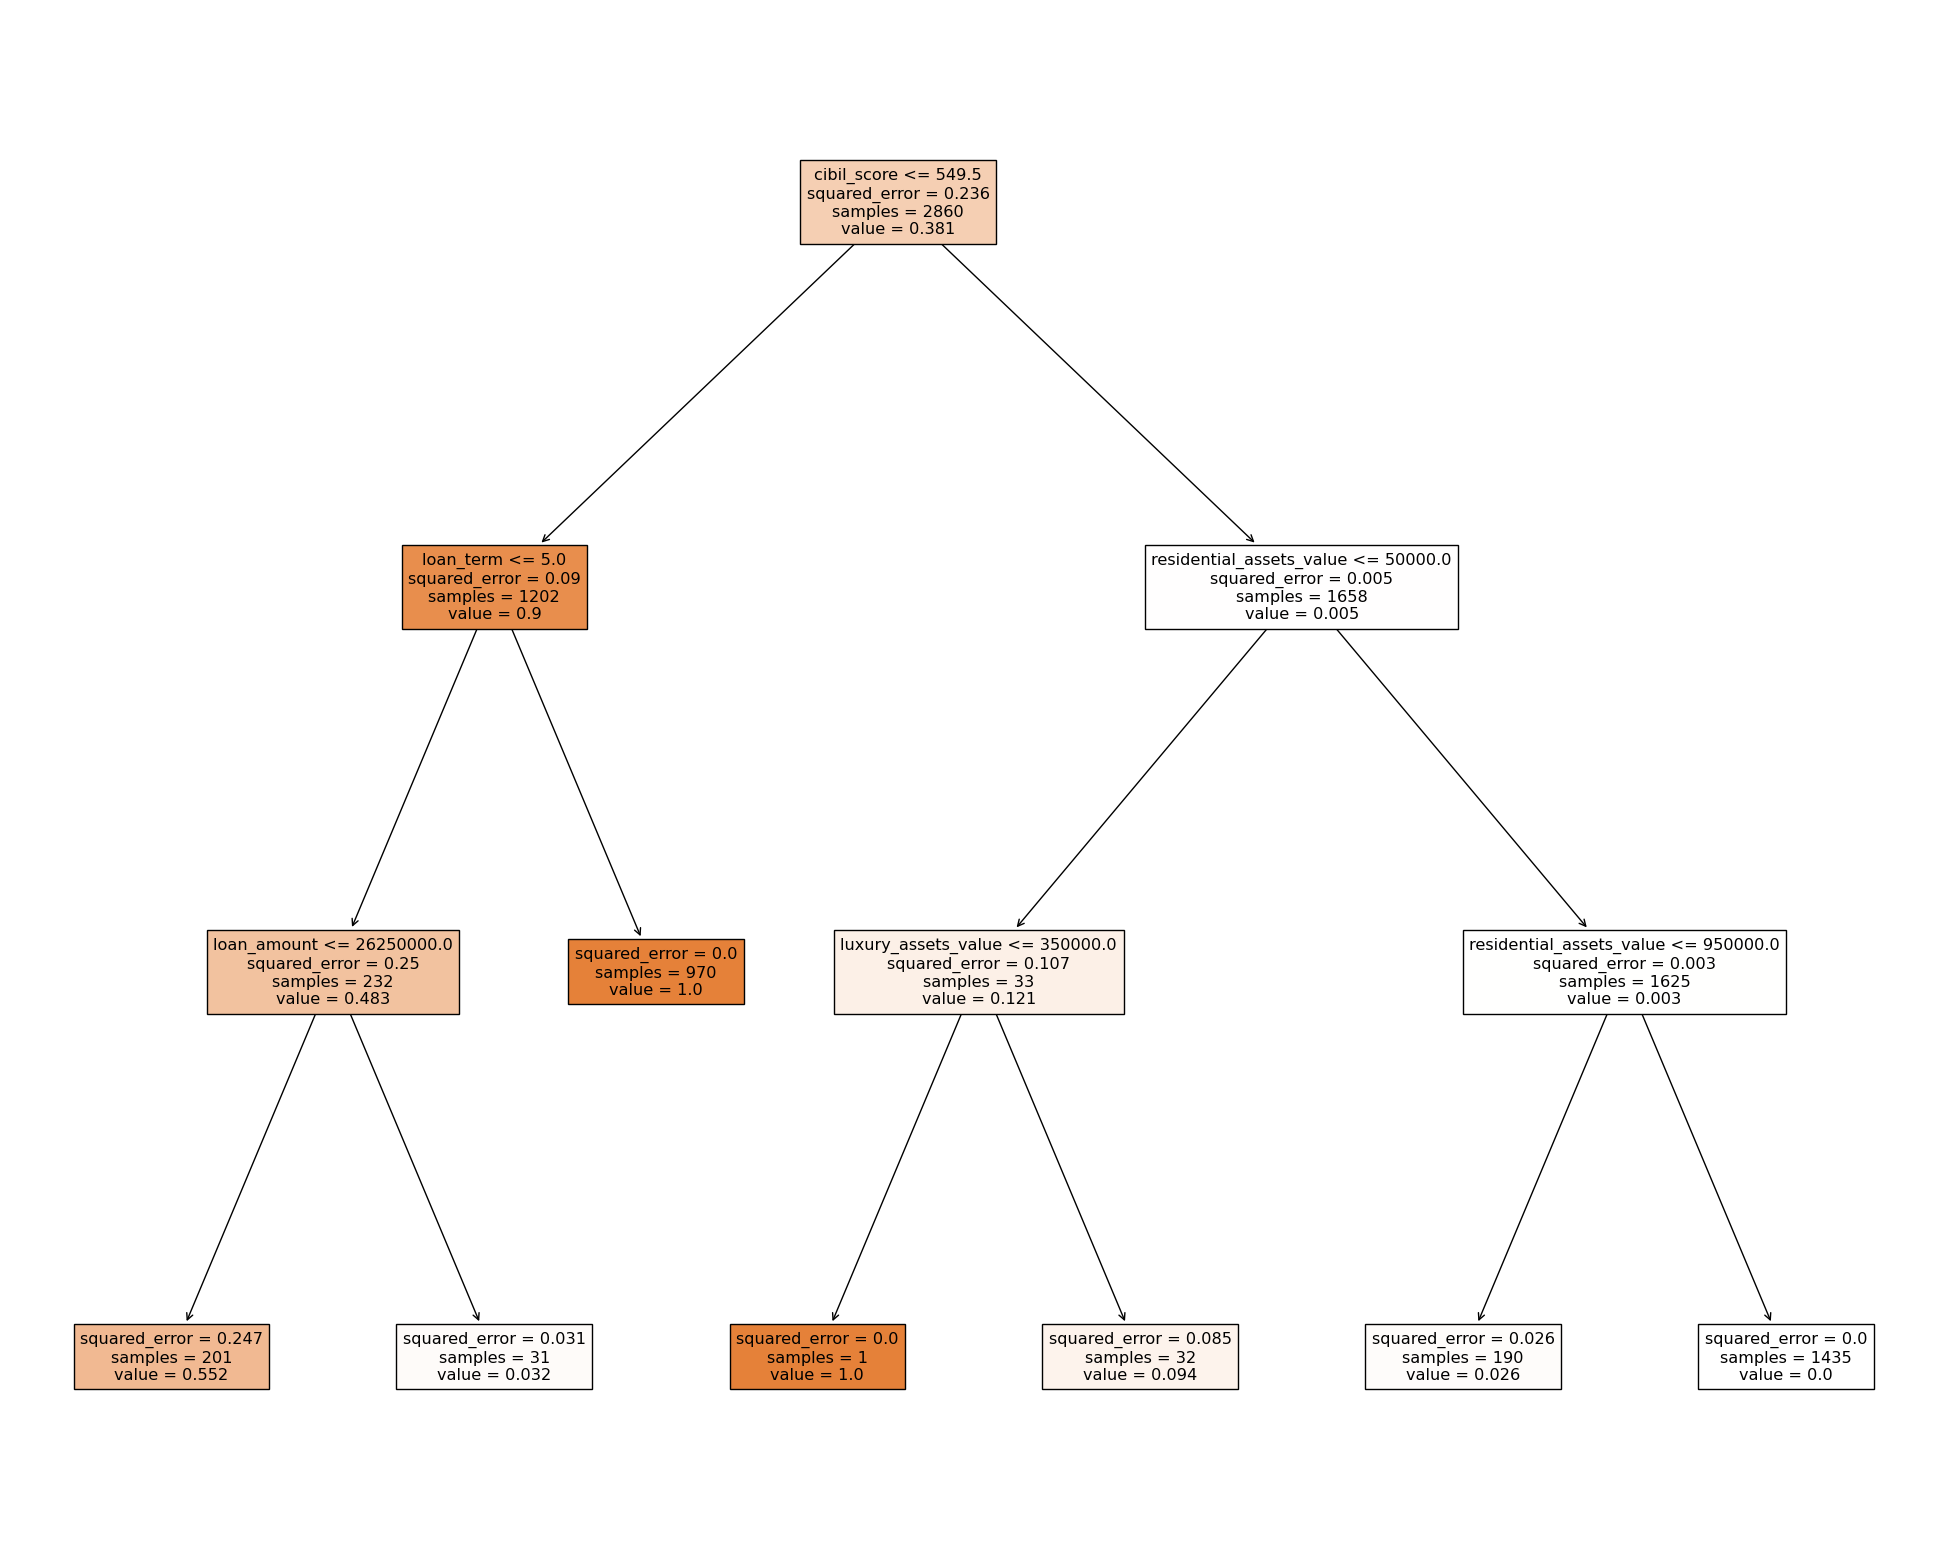

In [38]:
from sklearn import tree
from matplotlib import pyplot as plt

#set the figure size to 25 (width) and 20 (height)
fig = plt.figure(figsize=(25,20))

##The filled parameter in tree.plot_tree() fills the tree nodes with colors to indicate the majority class for classification tasks
tree.plot_tree(DTree, feature_names= features.columns, filled=True)

###Interpreting Nodes of a Tree-Based Model


The above decision tree is one of the many trees involved in predicting the target variable. Each decision tree regression predicts a number as an output for a given input. Random forest regression takes the average of those predictions as its final output.

As usual, the tree has conditions on each internal node and a value associated with each leaf (i.e. the value to be predicted). But additionally, we’ve plotted out the value at each internal node i.e. the mean of the response variables in that region.

Each terminal node aims to minimize the squared error, reflecting the goal of decreasing the variance in predictions.

The root node starts with 28636 samples and uses 'cibil_score' to split the data, resulting in two child nodes.

The feature that best splits the samples at the root is 'cibil_score', creating two subsequent nodes with squared errors of 0.09 and 0.0005, respectively, and containing 1202 samples with a squared error of 0.09 and 1658 samples with a very low squared error of 0.0005.

Subsequent splits are made based on 'loan_term' and 'residential_assets_value', further partitioning the data for more specific conditions. The leaf nodes demonstrate various MSE brackets, with each assigned a particular prediction value.

The halting of further growth in the tree is due to predefined stopping conditions to prevent overfitting. These conditions, such as maximum tree depth, minimum samples per leaf, or minimum reduction in error metric, ensure that the tree generalizes well to new data rather than perfectly fitting the training data, which could result in poor predictive performance on unseen data.

### 3. Use auto ml to find the best model


####AutoML

In [39]:
#importing the H2O machine learning library and the H2O AutoML module
import h2o
from h2o.automl import H2OAutoML

In [40]:
# Set a minimum memory size and a run time in seconds
min_mem_size=6
run_time=222

In [41]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)


Checking whether there is an H2O instance running at http://localhost:41480..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpo64e_5ou
  JVM stdout: /tmp/tmpo64e_5ou/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpo64e_5ou/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:41480
Connecting to H2O server at http://127.0.0.1:41480 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_unknownUser_fi84z8
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [42]:
# initialize H2O using the h2o.init()
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpul8xcsbv
  JVM stdout: /tmp/tmpul8xcsbv/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpul8xcsbv/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_unknownUser_heb92h
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [43]:
#creating an H2OFrame object from a pandas DataFrame df2

#df3 = h2o.H2OFrame(df2)

In [44]:
df_h2o= h2o.H2OFrame(df2)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [45]:
pct_rows = 0.80  # Setting up the data split between training and test dataset.
df_train, df_test = df_h2o.split_frame([pct_rows])

In [46]:
# import h2o
# from h2o.automl import H2OAutoML

# # Initialize H2O
# h2o.init()

# # Convert pandas DataFrames to H2O Frames
# train_h2o = h2o.H2OFrame(df_train)
# test_h2o = h2o.H2OFrame(df_test)

# # Identify predictors and response
# x = train_h2o.columns
# y = "loan_status"
# x.remove(y)

# # Run AutoML
# aml = H2OAutoML(max_runtime_secs=222, seed=1)
# aml.train(x=x, y=y, training_frame=train_h2o)

# # Check if both datasets contain 'loan_status' column
# if y in train_h2o.columns and y in test_h2o.columns:
#     print("Both training and test datasets contain the 'loan_status' column.")

# # Further processing or evaluation with AutoML model


In [47]:
# Setting up AutoML
def autoML(df_train, df_test):
    X = df_train.columns
    y = "loan_status"

    aml = H2OAutoML(max_runtime_secs=222, seed=1)  # Setting of AutoML
    aml.train(
        x=X, y=y, training_frame=df_train
    )  # Trainig the dataset on different models

    return df_train, df_test, aml


# Function to get best model from the AutoML leaderboard
def getBestModel(aml):
    model_index = 0
    glm_index = 0
    glm_model = ""
    aml_leaderboard_df = aml.leaderboard.as_data_frame()
    models_dict = {}

    for m in aml_leaderboard_df["model_id"]:
        models_dict[m] = model_index
        if "StackedEnsemble" not in m:
            break
        model_index = model_index + 1

    for m in aml_leaderboard_df["model_id"]:
        if "GLM" in m:
            models_dict[m] = glm_index
            break
        glm_index = glm_index + 1

    print(model_index)
    best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])
    return best_model


In [48]:
print(df_train.columns)
print(df_test.columns)


['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']
['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


In [49]:
# Print the original column names
print("Original column names:")
print(df_train.columns)

# Remove leading and trailing whitespaces from column names
df_train.columns = [col.strip() for col in df_train.columns]
df_test.columns = [col.strip() for col in df_test.columns]
# Print the column names after stripping whitespaces
print("\nColumn names after stripping whitespaces:")
print(df_train.columns)
print(df_test.columns)


Original column names:
['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']

Column names after stripping whitespaces:
['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']
['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


In [50]:
autoML = autoML(df_train, df_test)  # Training AutoML


AutoML progress: |
01:13:26.300: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

███
01:13:35.381: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


01:13:36.902: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

████
01:13:49.156: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
01:13:49.591: _response param, We have d

In [51]:
autoML[2].leaderboard  # Leaderbord of AutoML output



model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_grid_1_AutoML_1_20240318_11325_model_5,0.11018,0.0121397,0.0324385,0.0783031,0.0121397
StackedEnsemble_BestOfFamily_4_AutoML_1_20240318_11325,0.110518,0.0122141,0.0323014,0.0785699,0.0122141
StackedEnsemble_AllModels_3_AutoML_1_20240318_11325,0.110719,0.0122586,0.0334253,0.078782,0.0122586
StackedEnsemble_AllModels_2_AutoML_1_20240318_11325,0.116923,0.0136711,0.0477675,0.0842739,0.0136711
StackedEnsemble_AllModels_1_AutoML_1_20240318_11325,0.117118,0.0137167,0.0487843,0.0844795,0.0137167
XGBoost_grid_1_AutoML_1_20240318_11325_model_3,0.117965,0.0139158,0.0356845,0.0845922,0.0139158
StackedEnsemble_BestOfFamily_3_AutoML_1_20240318_11325,0.119391,0.0142543,0.0474395,0.0859605,0.0142543
StackedEnsemble_BestOfFamily_2_AutoML_1_20240318_11325,0.119734,0.0143362,0.0477354,0.0861305,0.0143362
GBM_2_AutoML_1_20240318_11325,0.120498,0.0145197,0.0507299,0.0865753,0.0145197
XGBoost_grid_1_AutoML_1_20240318_11325_model_9,0.121152,0.0146778,0.0470186,0.0864904,0.0146778


In [52]:
autoML_model = getBestModel(autoML[2])  # Getting Best Model
print(autoML_model)

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


0
Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20240318_11325_model_5


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    62                 62                          76402                  10           17           16.4194       22            133           94.1774

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.0024281075160317096
RMSE: 0.04927583095221946
MAE: 0.014695342456744706
RMSLE: 0.03379921889544598
Mean Residual Deviance: 0.0024281075160317096

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.012139701651522512
RMSE: 0.11018031426494714
MAE: 0.03243849667266521
RMSLE: 0.07830310238482745
Mean Res

In [53]:
autoML_model.algo

'gbm'

We can Interpret that loan_percent_income is the Most Important Variable among all with importance of 1.0 (Think as if this Importance is scaled to 100%) cb_person_crd_hist_length is 0.04

###4. Run SHAP analysis on the models from steps 1, 2, and 3, interpret the SHAP values and compare them with the other model interpretability methods.


###SHAP, Partial Dependence Plot, Individual Conditional Expectation Analysis for AutoML Best Model

AutoML has it's on shap analysis method built into the package since the SHAP package has no native support for the models on AutoML.

In [54]:
# Remove leading spaces from column names
df.columns = df.columns.str.strip()

# Verify the updated column names
print("Columns in the dataset after stripping leading spaces:")
print(df.columns)


Columns in the dataset after stripping leading spaces:
Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


In [55]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [56]:
## This code to convert loan_status to a numerical value
# Importing pandas library
import pandas as pd

# Assuming df is your DataFrame
# Label encoding 'loan_status' column
df['loan_status'] = pd.factorize(df['loan_status'])[0]

# Printing the first few rows to verify the conversion
df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

<Figure size 1200x800 with 0 Axes>

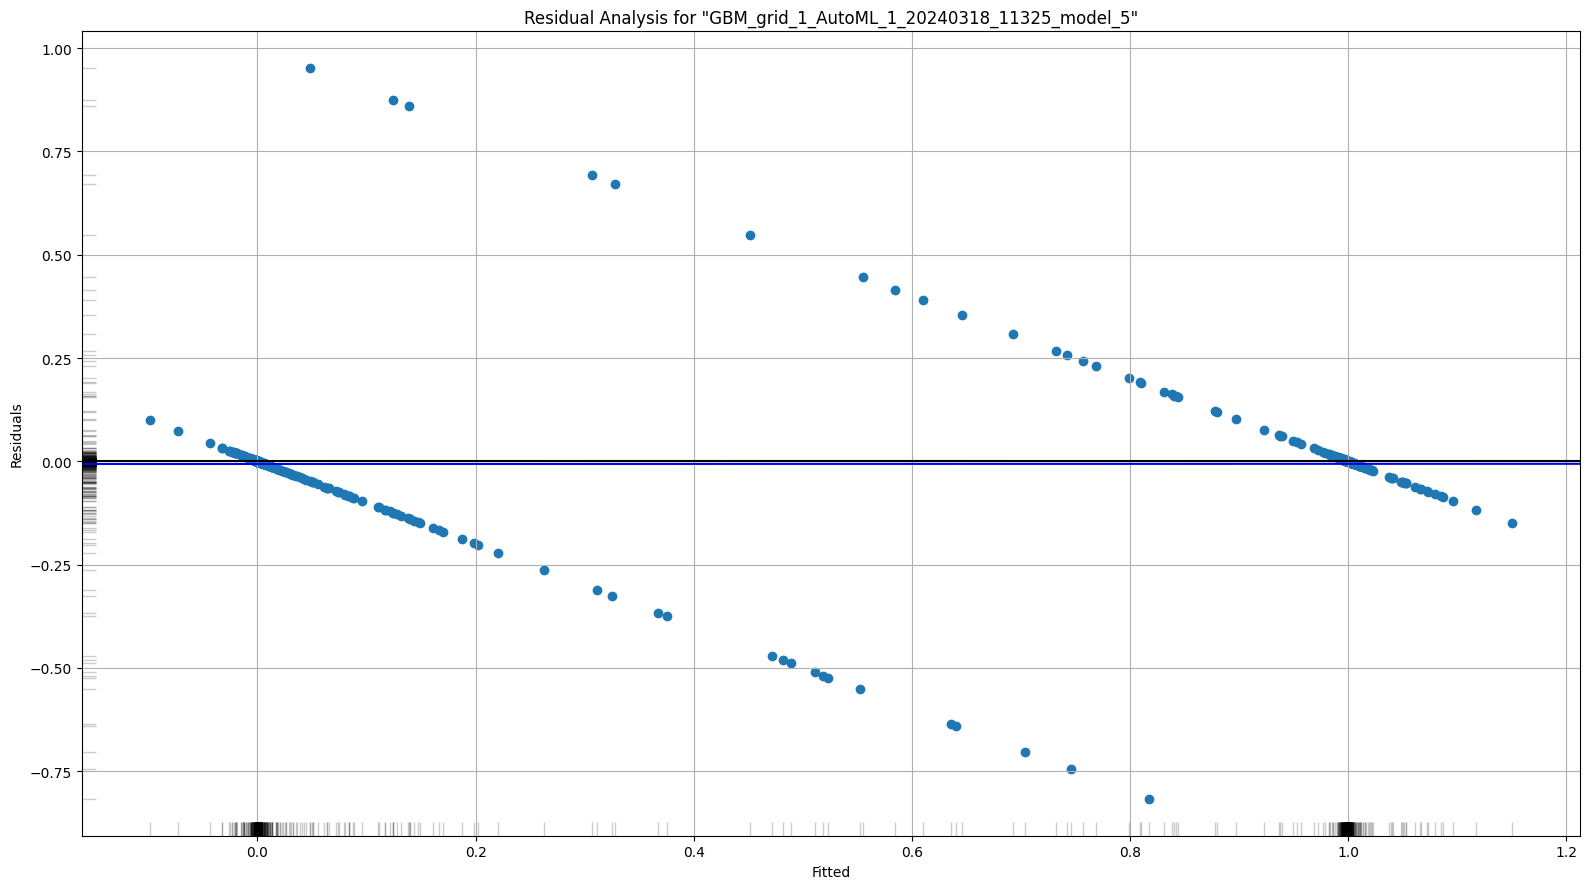

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

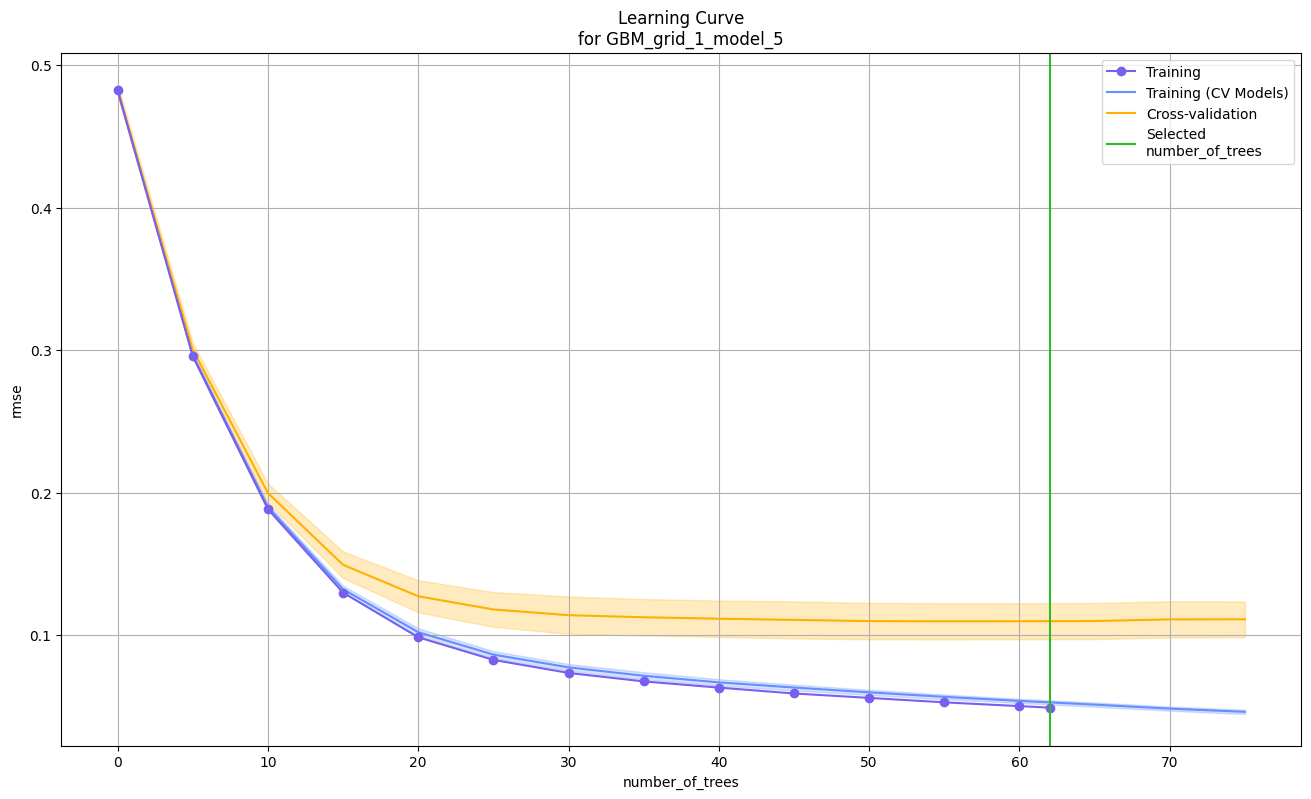

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

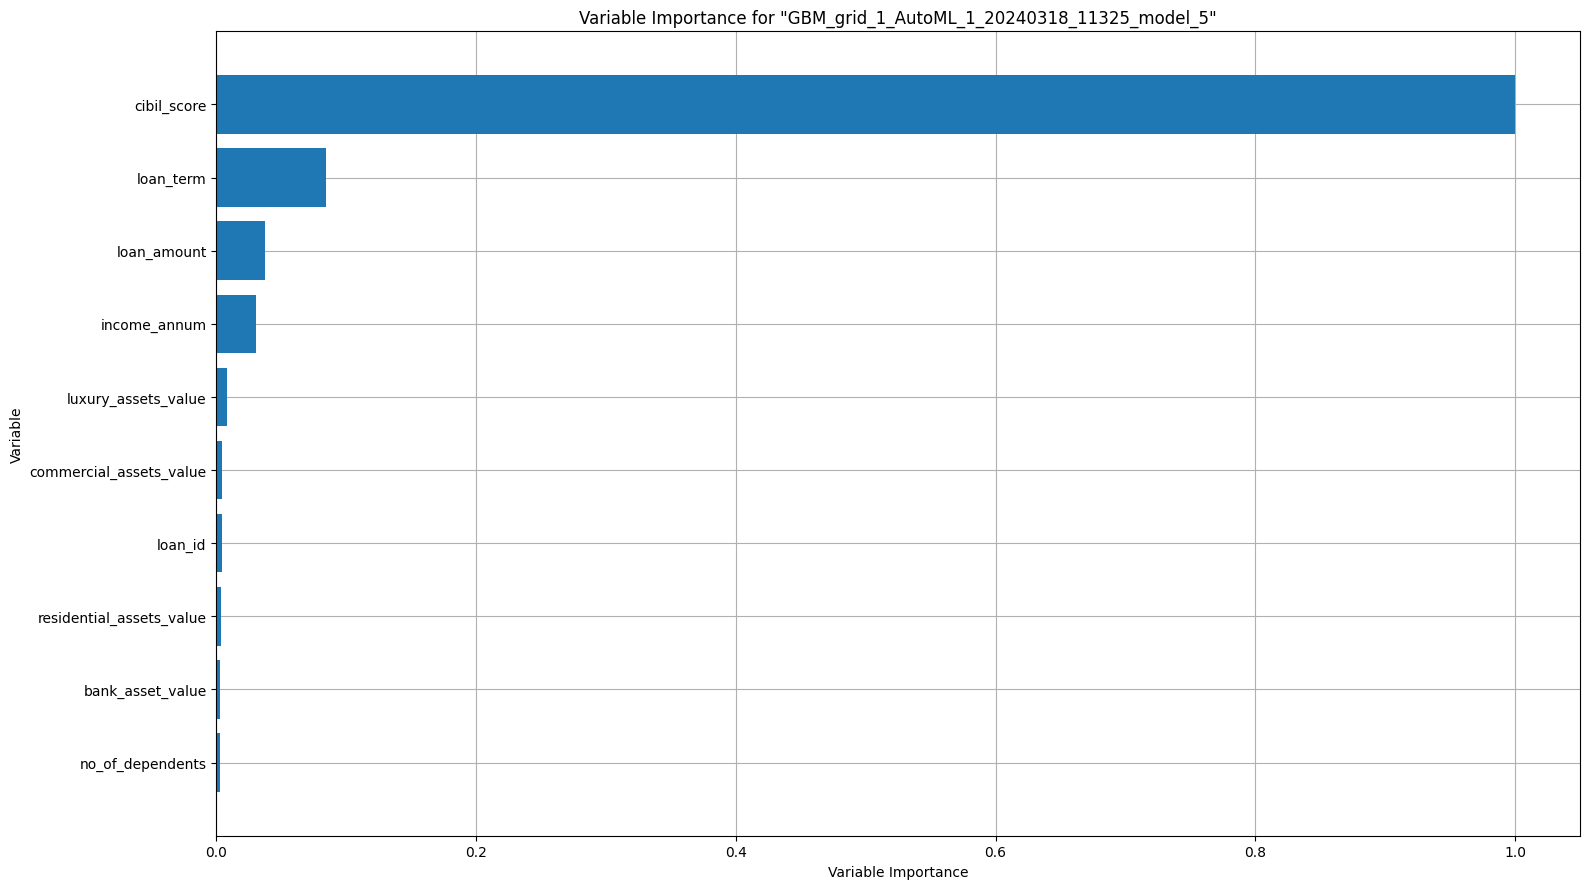

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

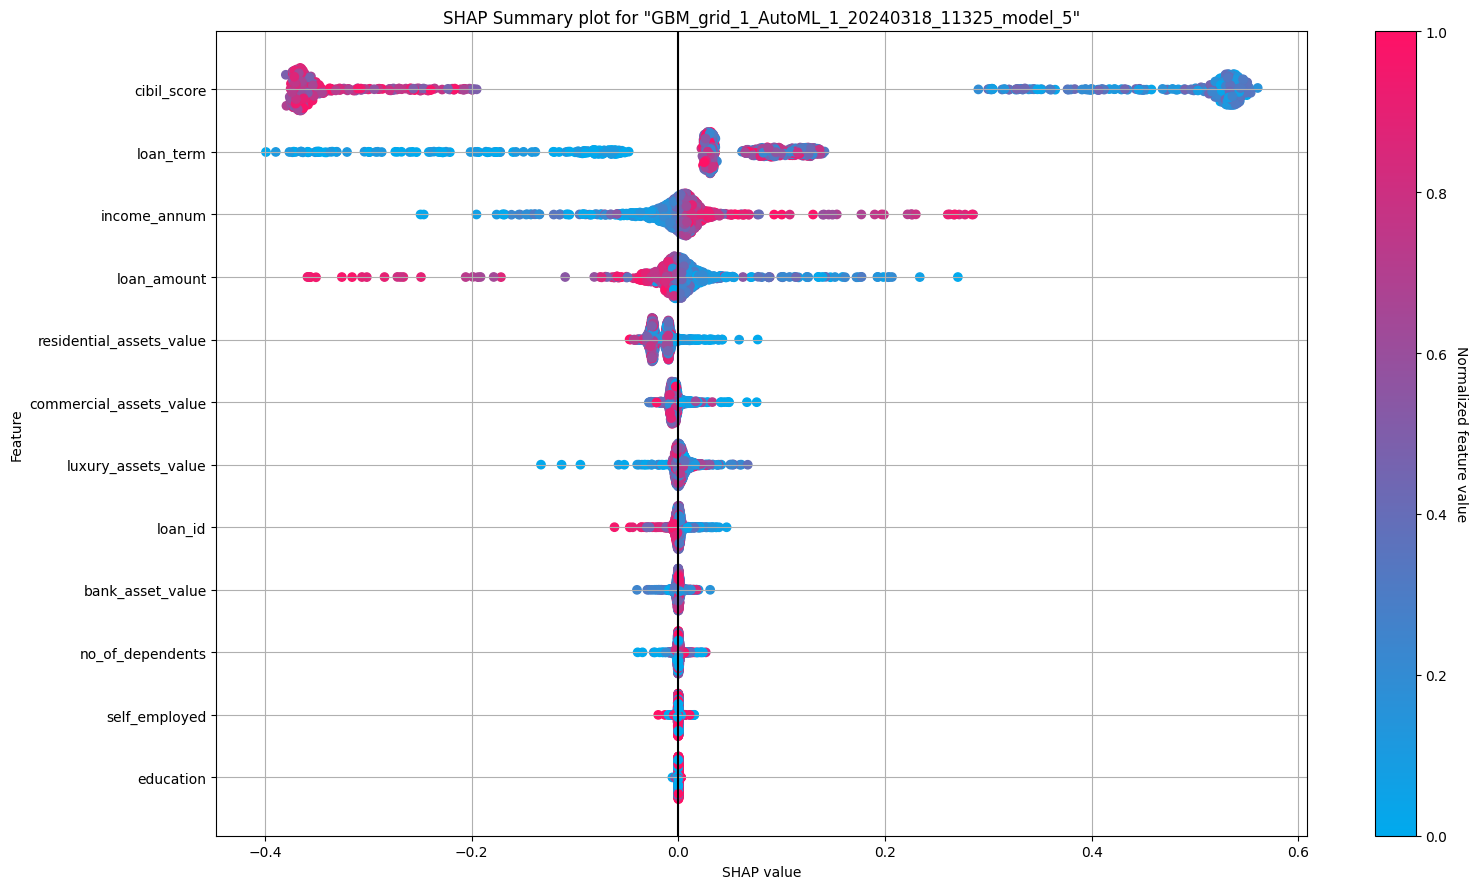

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

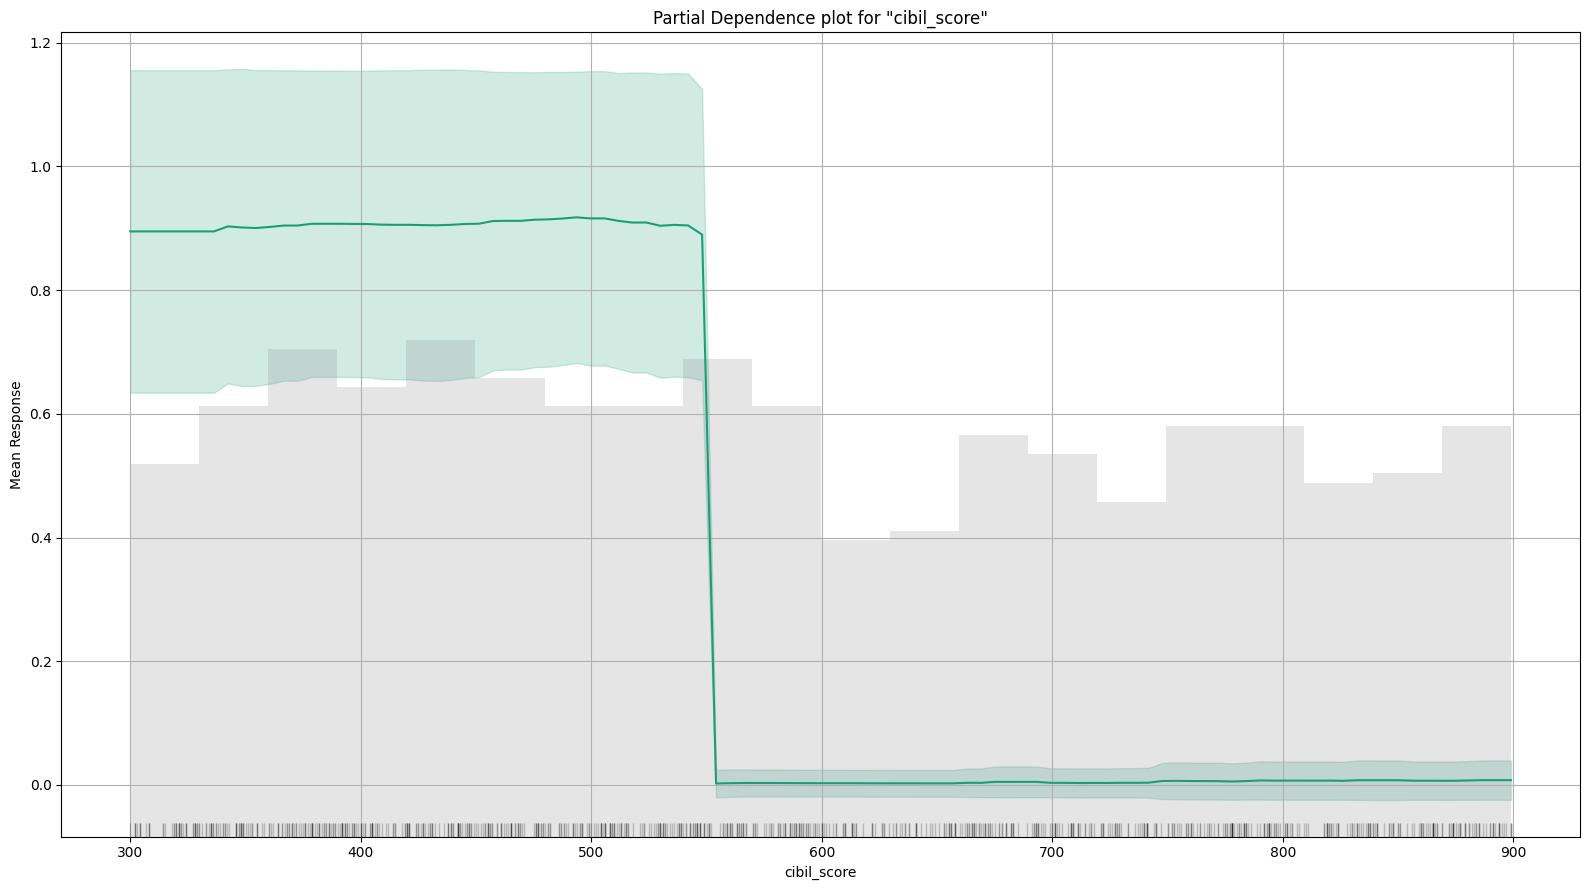

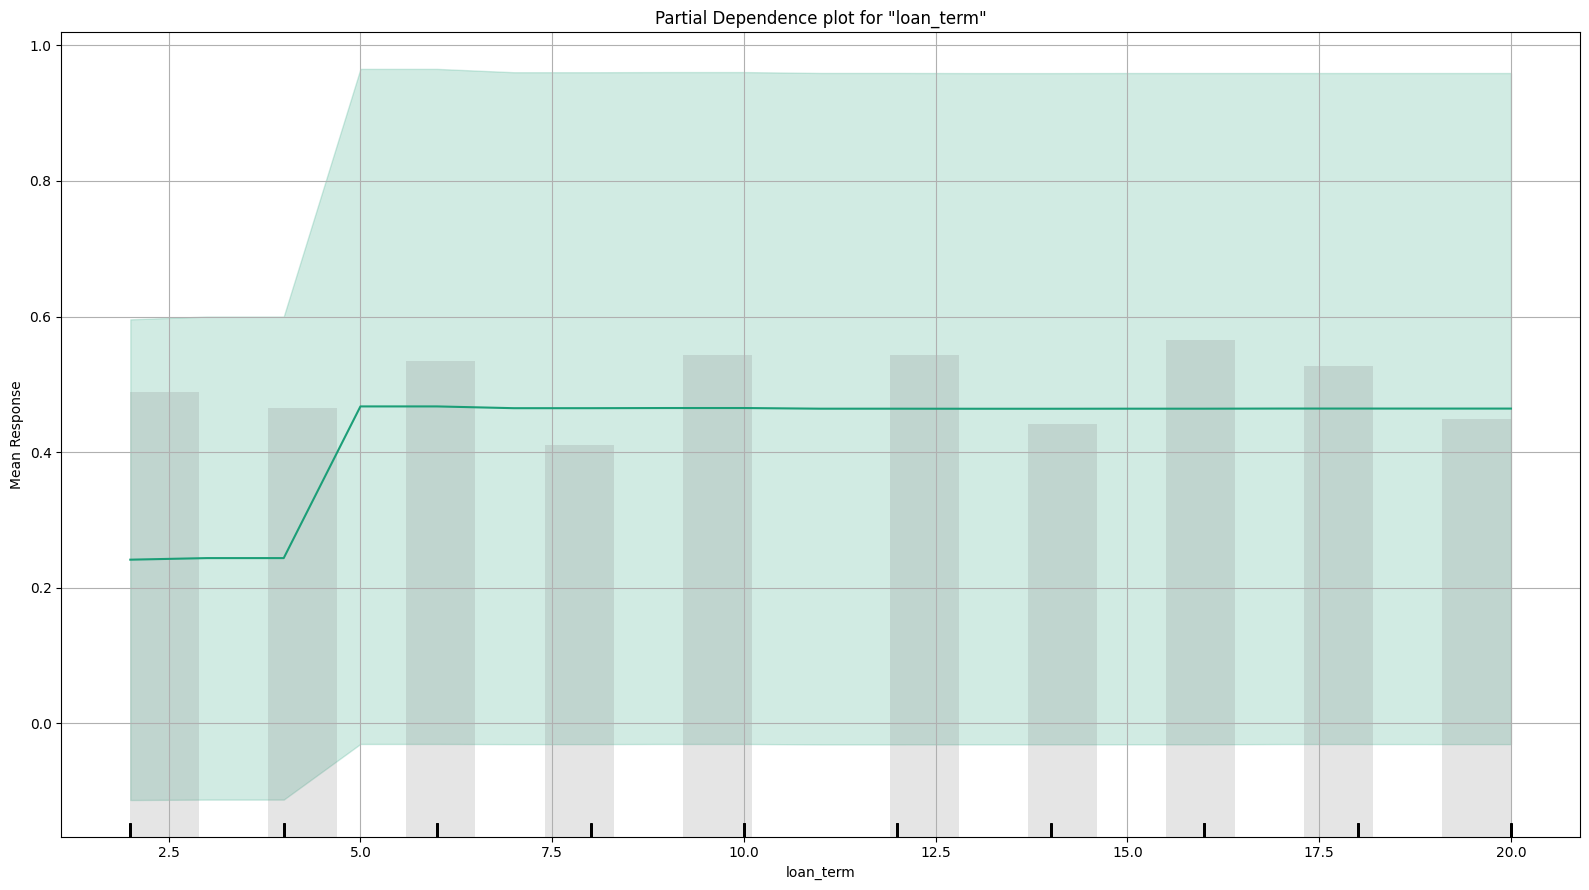

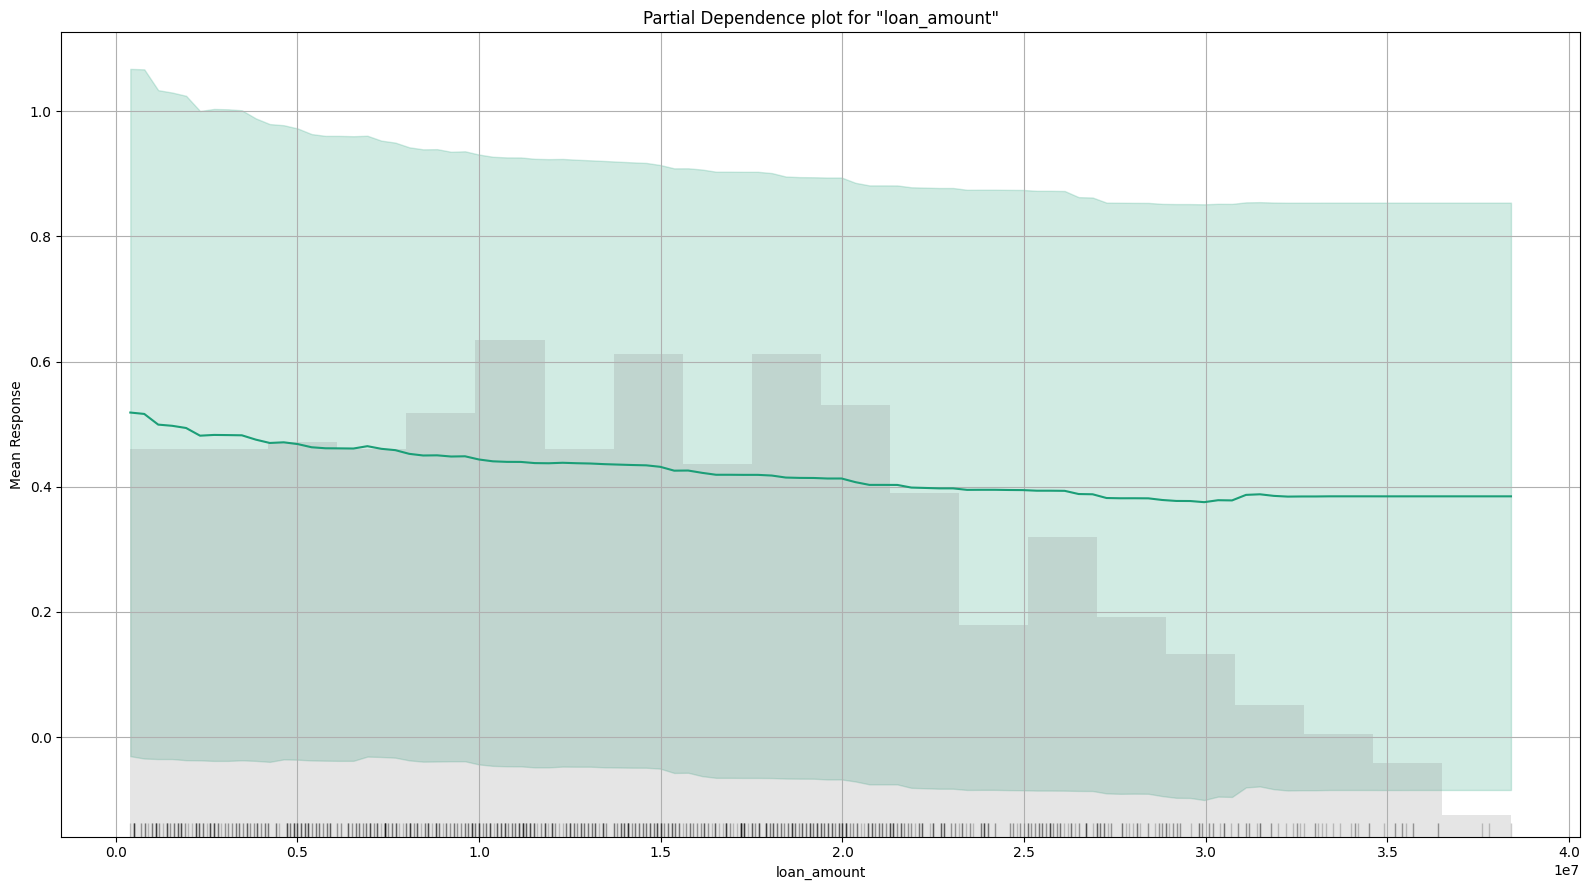

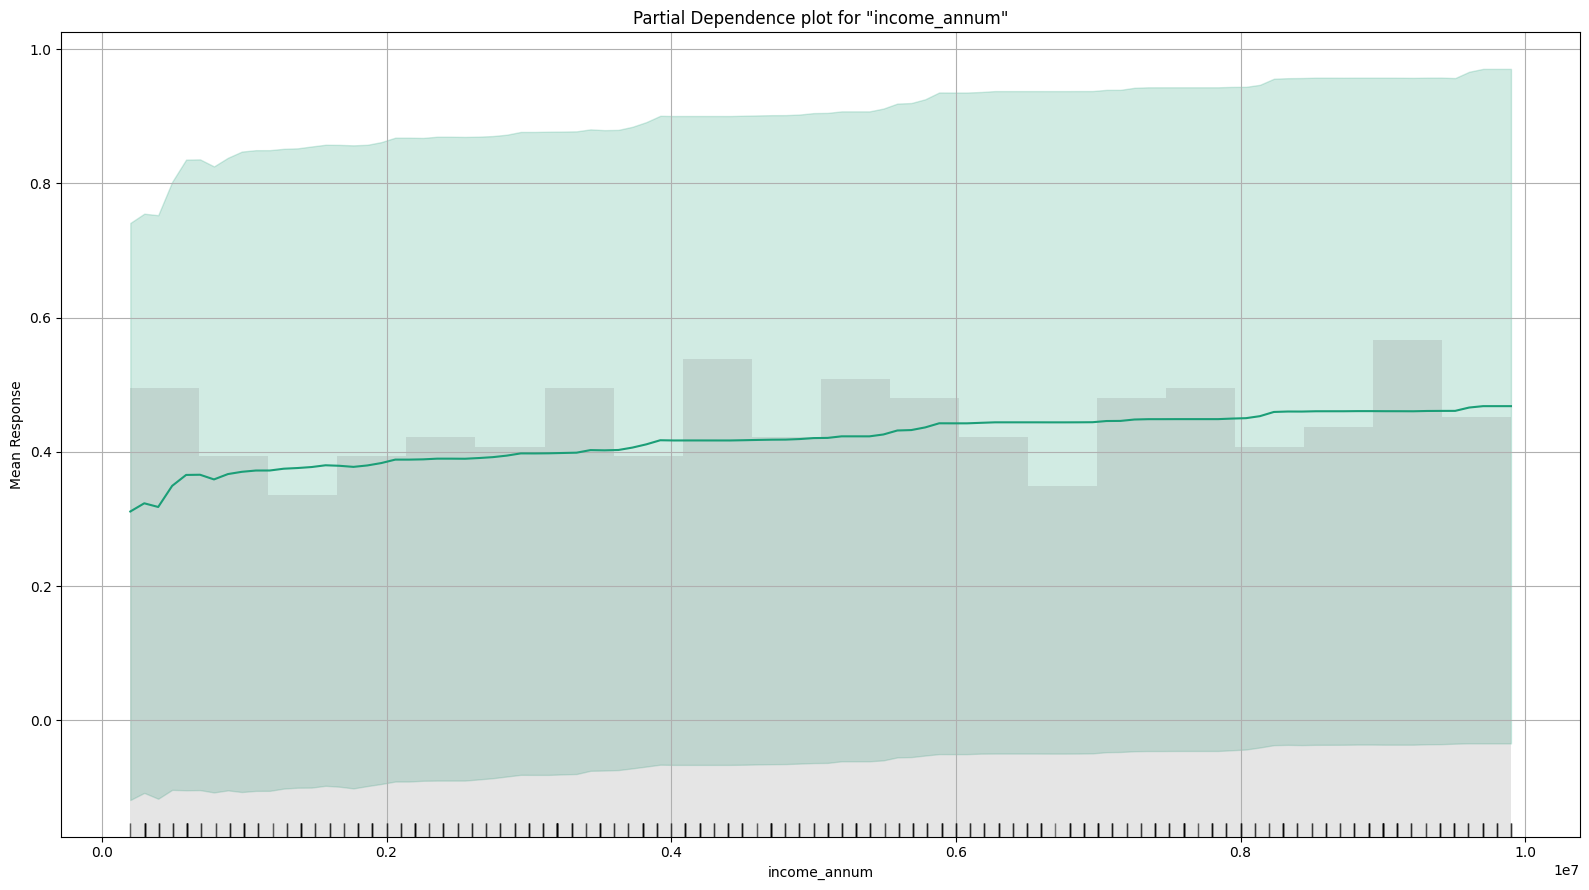

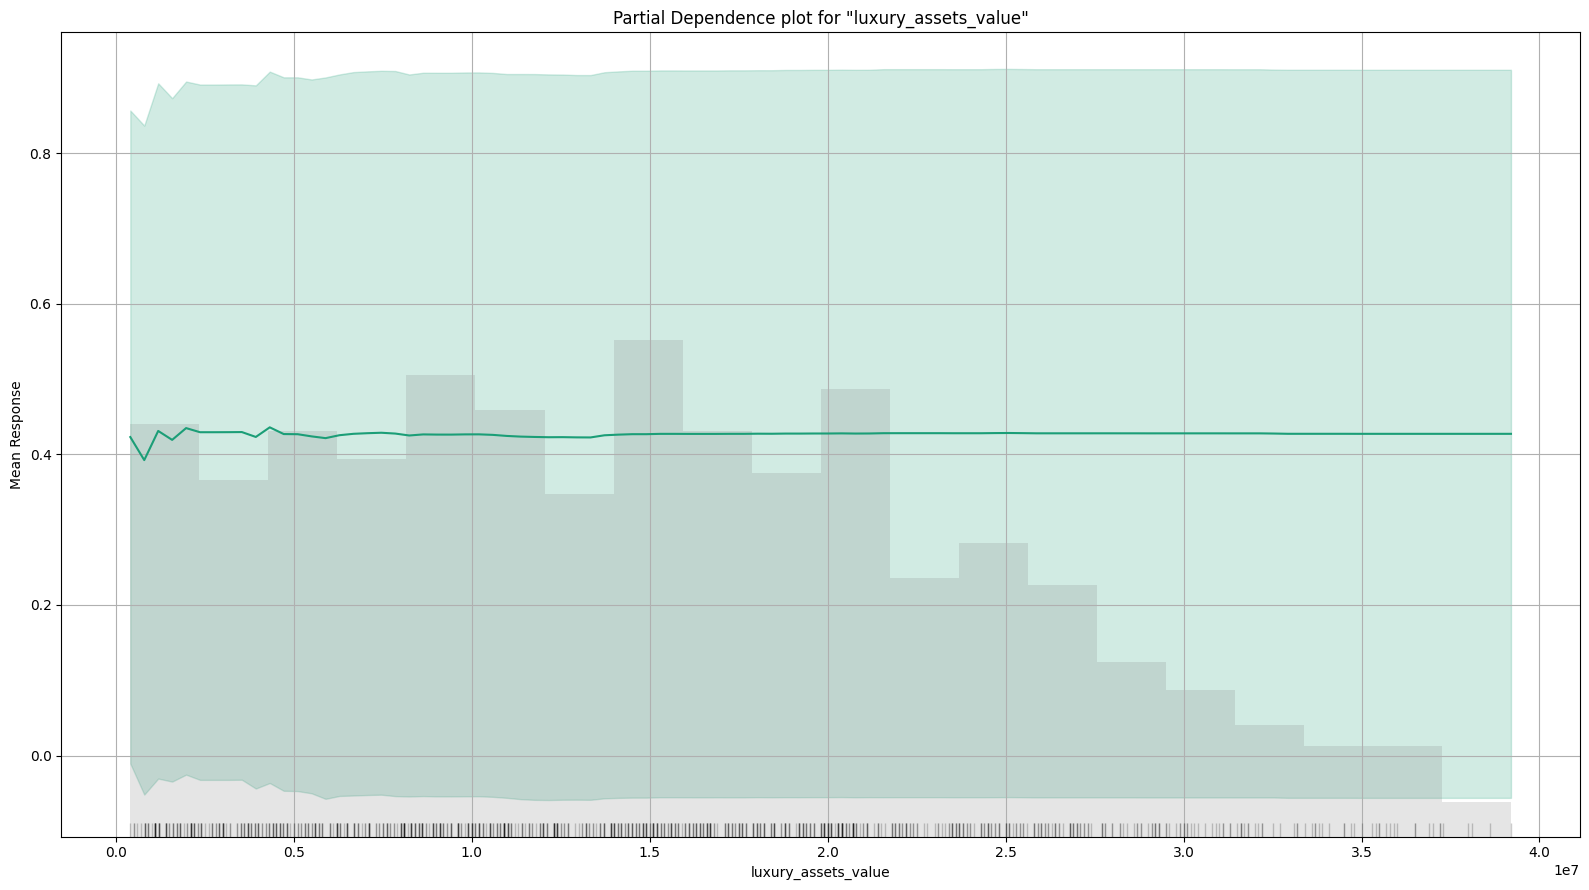

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

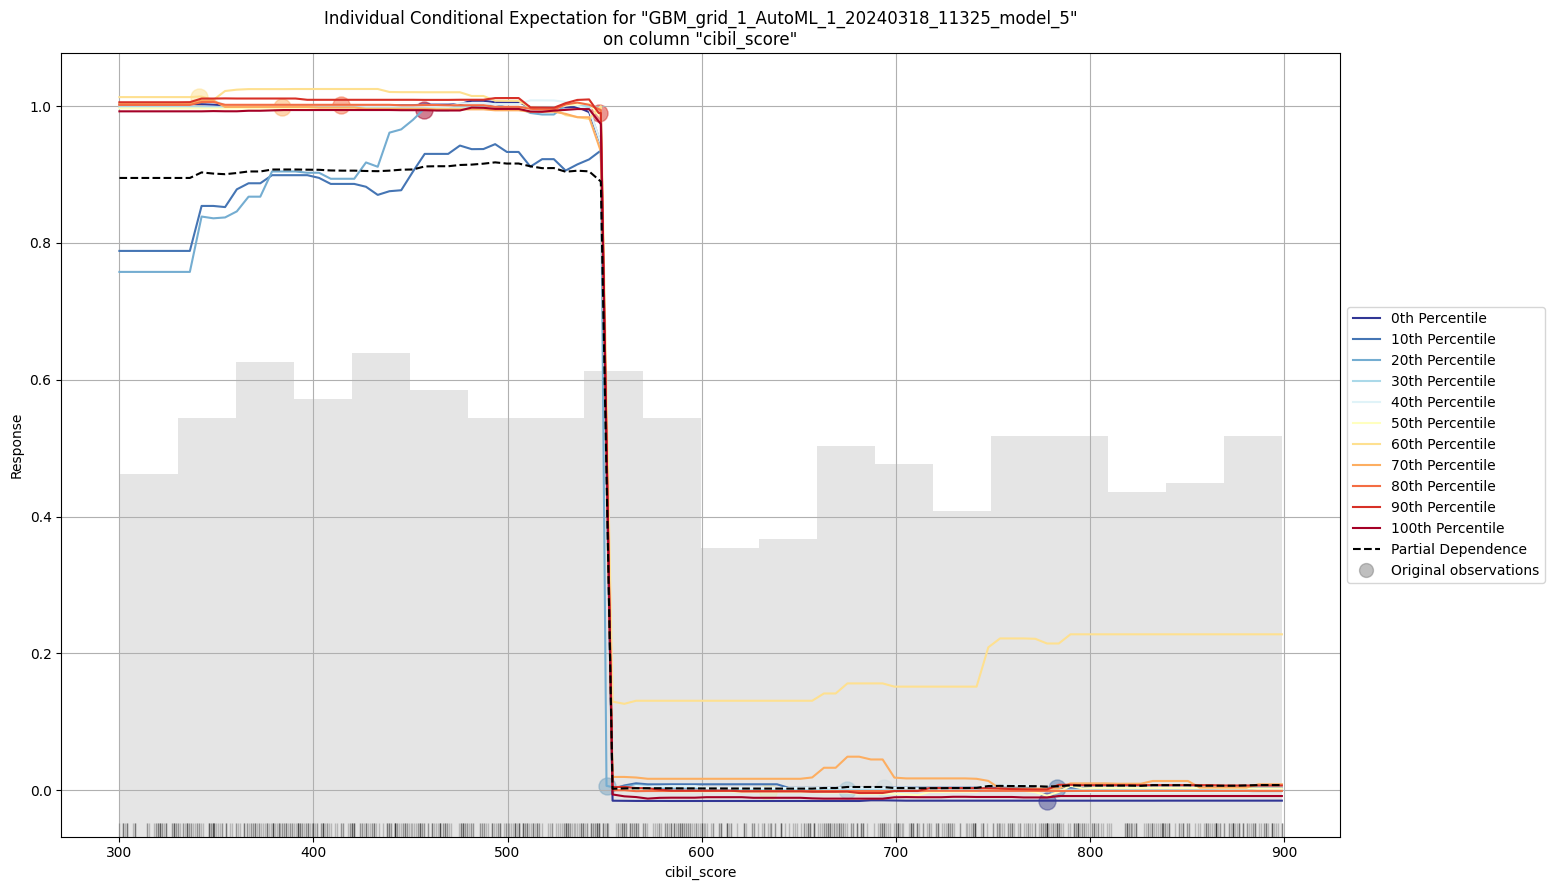

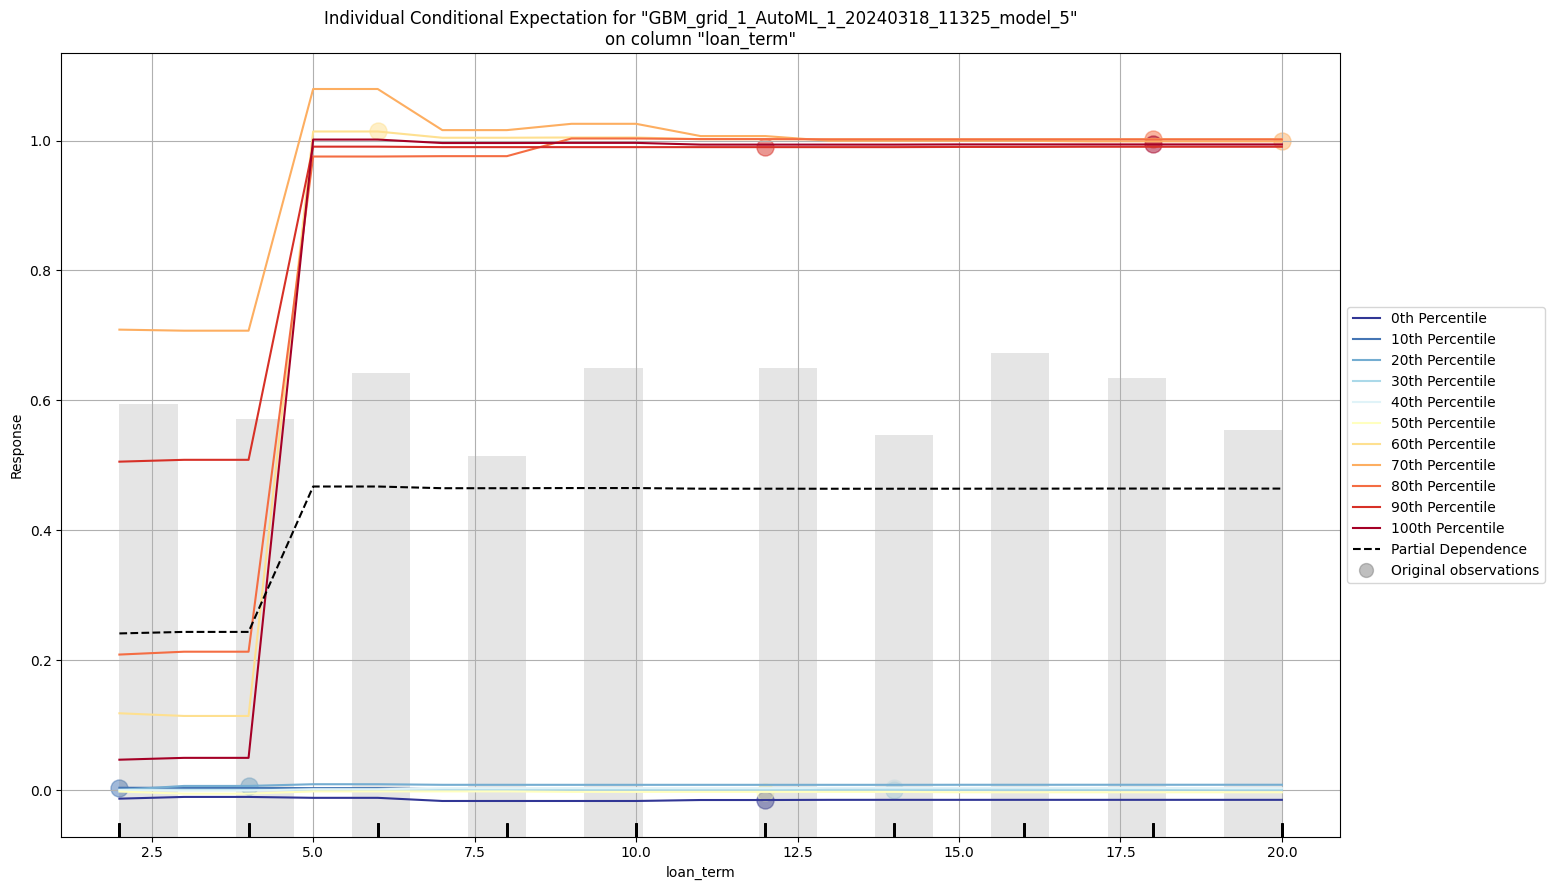

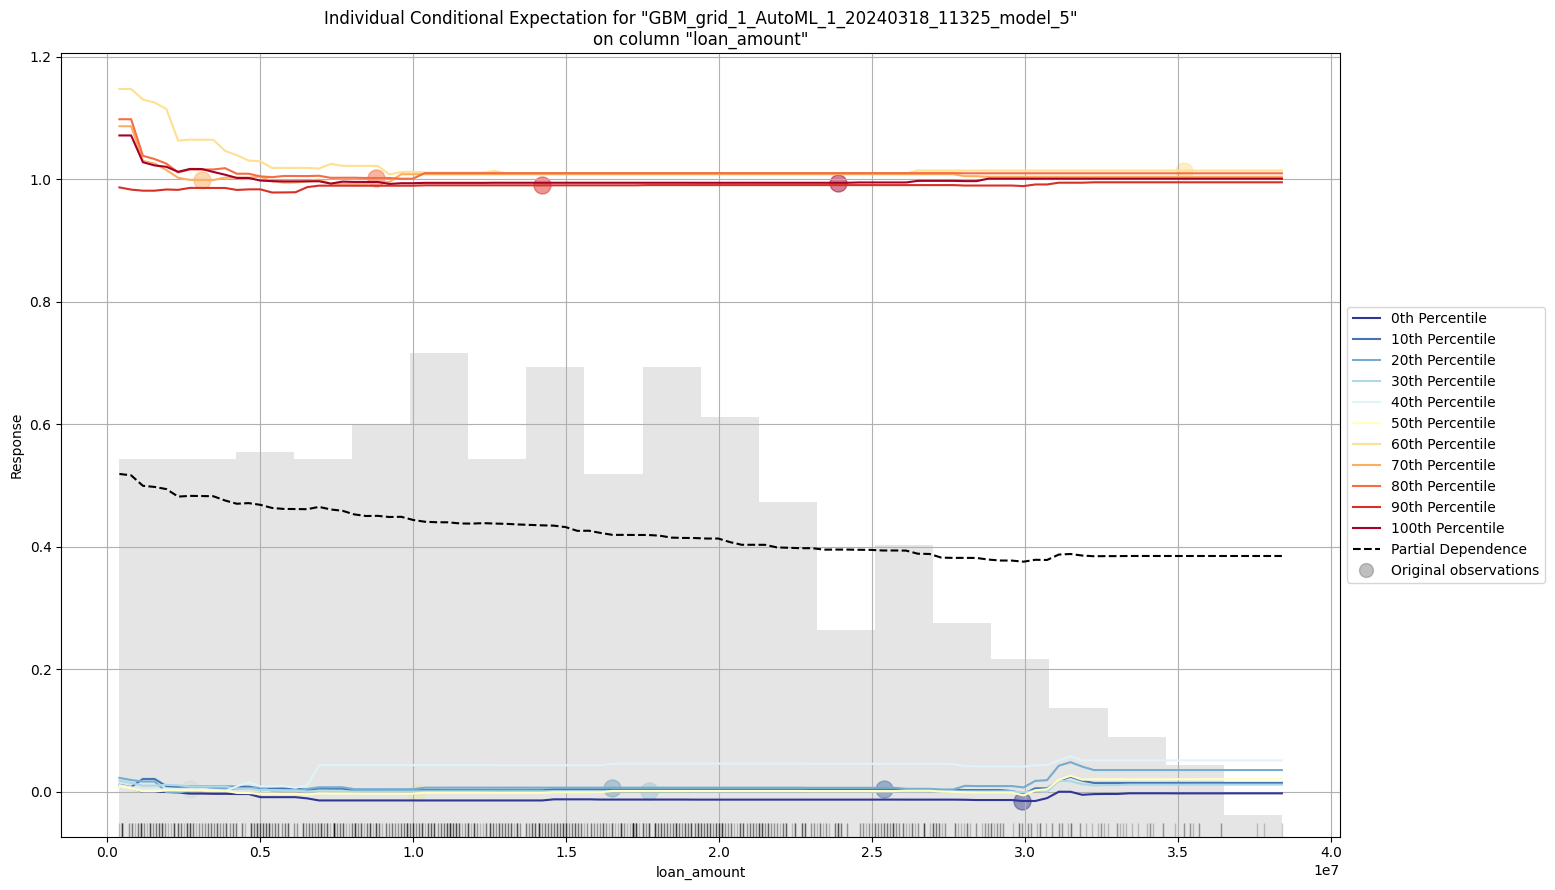

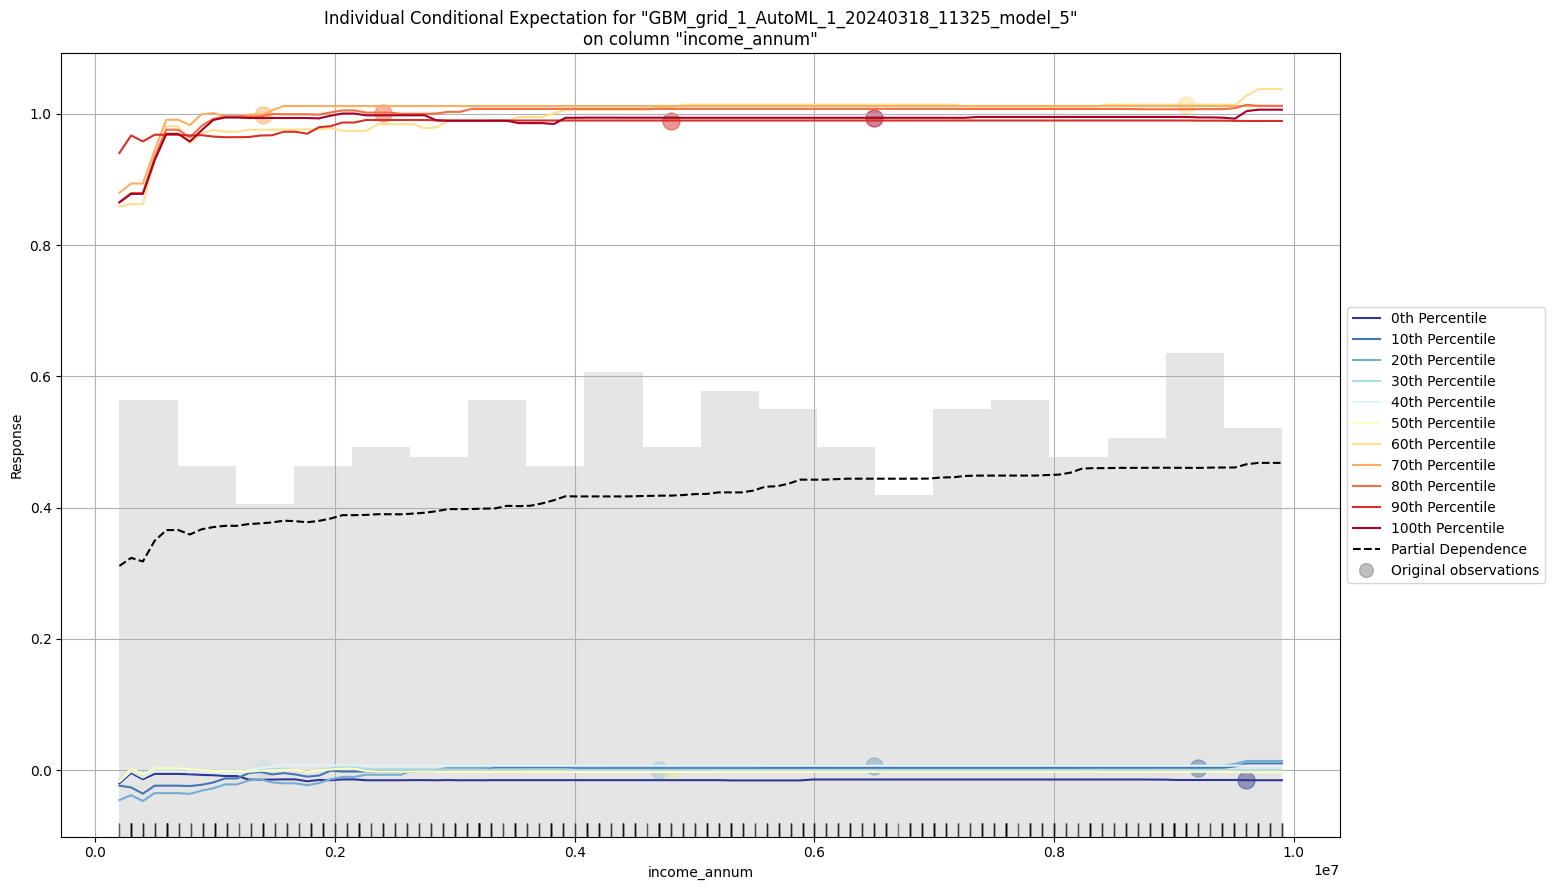

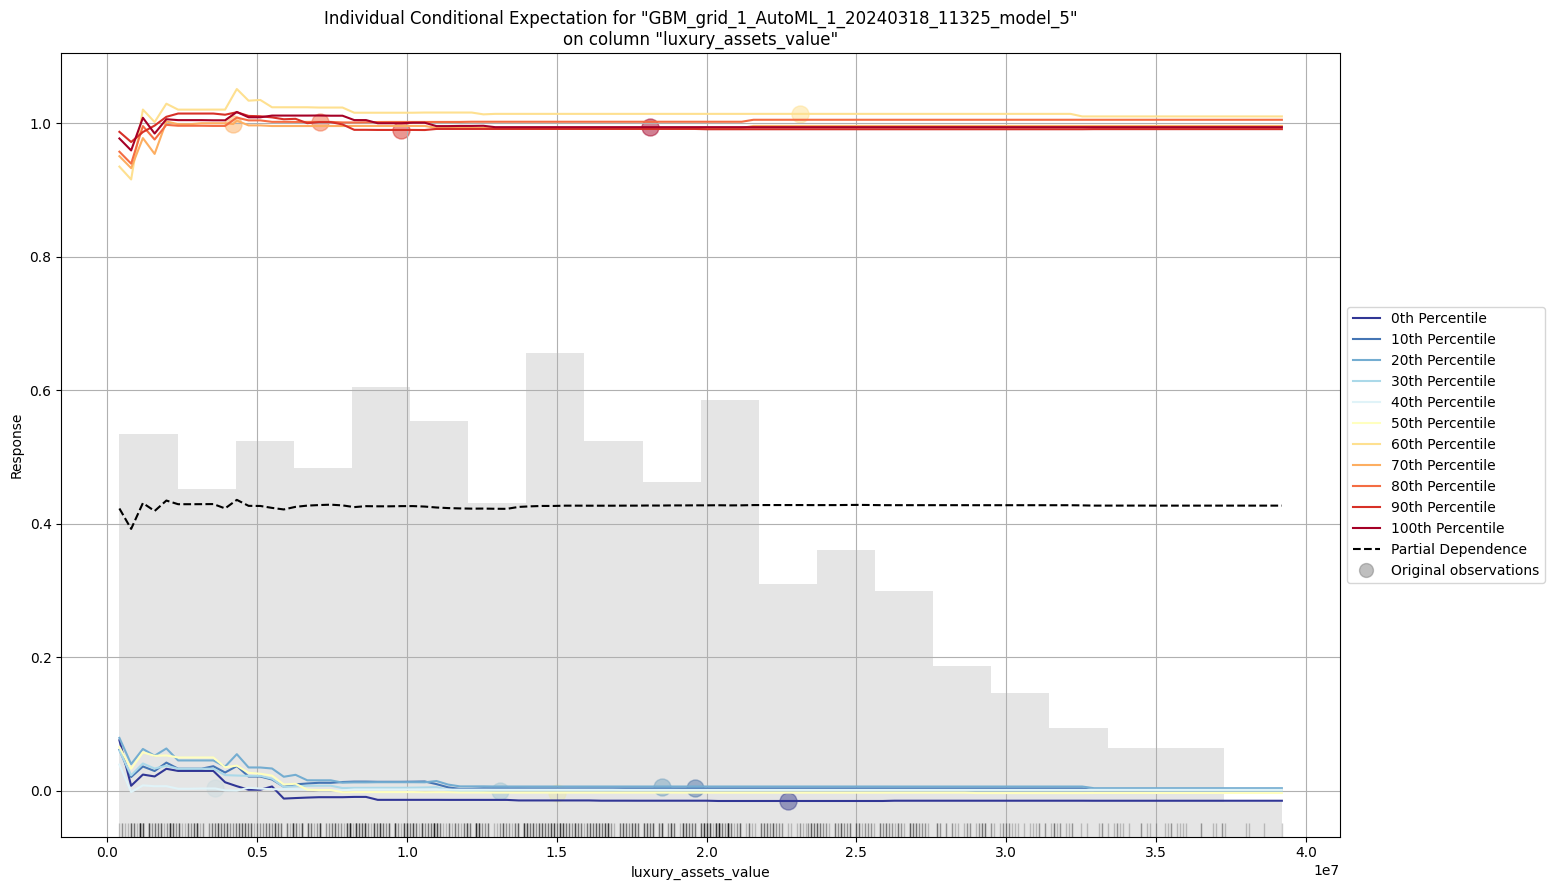

In [57]:
import matplotlib.pyplot as plt

# Set the size of plots
plt.figure(figsize=(12, 8))

# Get the leaderboard from the AutoML model
leaderboard = autoML[2].leaderboard

# Access the first model in the leaderboard (index 0)
best_model_id = leaderboard[0, "model_id"]

# Get the best model using its ID
best_model = h2o.get_model(best_model_id)

# Explain the best model
explanation = best_model.explain(df_test)



Learning Curve: It shows the relationship between the number of trees used in the model and the log loss for both training and cross-validation. The training and cross-validation loss decrease and then plateau, indicating that adding more trees beyond the selected number doesn't significantly improve the model on the validation set.

Variable Importance: This plot ranks the features by their importance in the model. 'cibil_score' appears to be the most important feature, with 'loan_term' and 'loan_amount' following.

SHAP Summary Plot: This plot provides a dense summary of the effect each feature has on the model output. The position on the X-axis indicates the impact on the prediction, with 'cibil_score' again appearing to be the most influential. The color represents the feature value (red high, blue low). This plot shows that higher 'cibil_score' values tend to push the model output higher, which likely corresponds to a higher likelihood of loan approval.

Partial Dependence Plots: These plots show the marginal effect one or two features have on the predicted outcome of a machine learning model. For 'cibil_score', there's a significant change in the mean response when the score is low, which stabilizes as the score increases. For 'loan_term', 'loan_amount', 'income_annum', and 'commercial_assets_value', the plots show a more stable mean response across their ranges, indicating a smaller or more uniform effect on the model's predictions.

Confusion Matrix: This matrix provides a tabular summary of the performance of my classification model. The threshold chosen based on the F1 score (which balances precision and recall) is approximately 0.407. At this threshold, the model has:

True Positives (Approved correctly): 521
True Negatives (Rejected correctly): 318
False Positives (Rejected incorrectly): 2
False Negatives (Approved incorrectly): 10
The error rates are quite low, suggesting the model performs well.

Combining these insights, the 'cibil_score' appears to be a significant predictor for loan approval decisions in this model, and overall model performance is strong with low error rates.

###Interpreting SHAP values from AutoML

####Residual Analysis

The residual plot for the GBM model from AutoML shows a pattern of striped lines, indicative of an integer-valued response variable rather than a continuous one. Despite this, the residuals appear to be normally distributed, showing no signs of heteroscedasticity, as they are spread uniformly across different levels of fitted values. The even distribution of data points above and below the zero residual line suggests that the model has a good fit to the data, capturing the underlying trend.

####Variable Importance

The Variable Importance plot demonstrates the cibil_score as the most significant predictor in determining loan approval within the XGBoost model, asserting its paramount role in the decision-making process. The loan_term and loan_amount also contribute notably but are considerably less influential than the cibil_score. Features related to the applicant's income and asset values are less critical, indicating the model's focused reliance on credit history over other financial indicators. The plot reveals a clear hierarchy of feature importance that aligns with intuitive expectations for loan approval criteria.

####SHAP Summary

The features are ranked by their importance in the model prediction. The cibil_score has the most substantial impact, followed by loan_term, and so forth. This suggests that the credit score is the most significant predictor for the outcome of the model, which is intuitive for a loan approval scenario.

The position on the SHAP value axis (horizontal axis) shows whether the effect of a value is to increase or decrease the prediction. A positive SHAP value (to the right of zero) pushes the prediction higher, while a negative value (to the left of zero) pushes the prediction lower. For instance, a higher cibil_score is associated with a positive impact on loan approval.

The color represents the magnitude of the feature value, with red indicating high and blue indicating low. For example, higher cibil_scores (in red) tend to increase the likelihood of loan approval, while lower scores (in blue) decrease it.

The spread of the dots represents the distribution of the impacts across the dataset. For the cibil_score, we observe a broad distribution of red dots (high values) across a wide range of positive SHAP values, indicating a consistent positive impact of high credit scores on the model's output.

For some features, the spread of SHAP values at different feature levels can indicate possible interaction effects with other features. If a feature has a wide distribution of SHAP values at a specific feature value, it suggests that the impact of this feature value varies depending on the values of other features.

Unlike traditional feature importance that might overestimate the importance of continuous or high-cardinality categorical variables, SHAP values provide a nuanced view. They allow us to observe how each feature value specifically contributes to each prediction, revealing the asymmetric and non-linear impact that features can have on the model's decision process.

#### Partial Dependence Plot (PDP)


There is a pronounced threshold effect indicating that credit scores below approximately 600 substantially decrease the likelihood of loan approval. Above this threshold, the mean response plateaus, suggesting that higher credit scores do not significantly increase the chances of loan approval beyond this point.
The impact of the loan term on the likelihood of approval is minimal, with only a slight increase in mean response for terms up to 10 years. The flatness of the plot beyond this range suggests that for longer loan terms, the duration of the loan has little to no effect on the prediction.
A gentle negative trend in the PDP indicates that higher loan amounts could slightly reduce the likelihood of approval. This effect is mild, implying that while the model considers loan amount in its predictions, it is not a predominant factor compared to others like cibil_score.
The flat PDP for annual income suggests that within the data's observed range, variations in income have a negligible influence on loan approval. This could point towards other features being stronger predictors or the possibility of non-linear interactions between income and other variables not captured by the PDP.
The value of commercial assets demonstrates a flat PDP, signifying that this feature does not have a strong influence on the model's decisions. Whether the value is high or low, the change in prediction is minimal, hinting that the existence of commercial assets, rather than their value, may be considered in the model.
The PDPs reveal that the XGBoost model prioritizes certain features over others when predicting loan approval outcomes. cibil_score stands out as a significant determinant, with clear implications for approval or rejection based on a specific threshold. Other features show varying degrees of influence, with some like loan_term and commercial_assets_value having little impact on the model’s predictions. Overall, these insights help understand the relative importance and interaction of features within the model, offering a comprehensive picture that can guide more informed decision-making and model interpretation.

#### Individual Conditional Expectation (ICE)

The Individual Conditional Expectation plots provided show the relationship between different features and the model response for individual instances across the dataset, unlike Partial Dependence Plots (PDP) which average out the effects.

The ICE plot for the 'cibil_score' feature indicates that as the credit score increases, the model's response typically rises, reflecting a decreasing credit risk. However, this trend is not universal for all instances—while the 0th percentile curve suggests a strong positive response as 'cibil_score' increases, the 100th percentile curve shows a less pronounced change, indicating that other factors may be influencing the credit risk assessment for this particular instance.

Similar observations can be made for 'loan_term,' 'loan_amount,' 'income_annum,' and 'luxury_assets_value.' For 'loan_term,' the model's response decreases with longer terms at the lower percentiles, but the higher percentiles show little to no change. In the case of 'loan_amount' and 'income_annum,' we don’t see substantial shifts in model response across different instances, suggesting a consistent interpretation of these features by the model. The 'luxury_assets_value' shows an interesting pattern where the model response initially increases and then stabilizes, indicating a threshold beyond which additional value does not significantly change the credit risk prediction.

In [58]:
df_test.head()

loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1,2,0,0,9.6e+06,2.99e+07,12,778,2.4e+06,1.76e+07,2.27e+07,8e+06,0
16,5,1,0,4.7e+06,1.07e+07,10,794,5.7e+06,3.9e+06,1.64e+07,4.4e+06,0
24,0,1,1,500000,1.4e+06,2,551,900000,600000,1.1e+06,300000,0
25,0,1,0,4.9e+06,9.8e+06,16,324,3.8e+06,8.7e+06,1e+07,3.3e+06,1
30,3,1,1,9e+06,3.15e+07,10,850,2.18e+07,1.24e+07,3.37e+07,8e+06,0
39,5,0,0,3.6e+06,7.7e+06,16,830,7e+06,1.3e+06,1e+07,2.9e+06,0
40,3,1,1,1.5e+06,5.1e+06,6,352,100000,200000,5.6e+06,900000,1
42,2,1,0,9.1e+06,2.49e+07,16,822,2.23e+07,1.21e+07,3.1e+07,5.2e+06,0
55,2,0,1,5.1e+06,1.97e+07,20,590,7.4e+06,9.3e+06,1.94e+07,3.4e+06,0
62,3,1,1,9.6e+06,3.05e+07,18,669,4.7e+06,1.9e+06,2.65e+07,9.3e+06,0


In [59]:

print("Columns in df_train:")
print(df_train.columns)

Columns in df_train:
['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


#SHAP Analysis for Linear Model

PermutationExplainer explainer: 2861it [03:36, 12.87it/s]


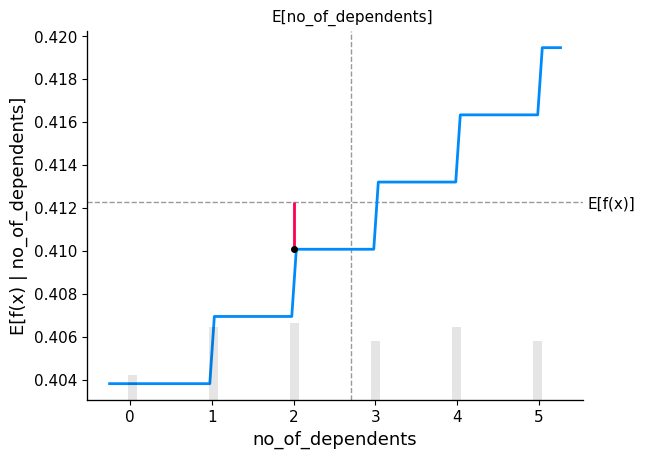

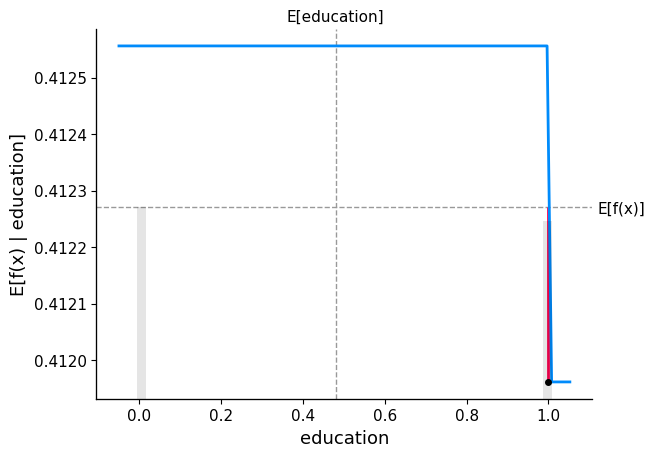

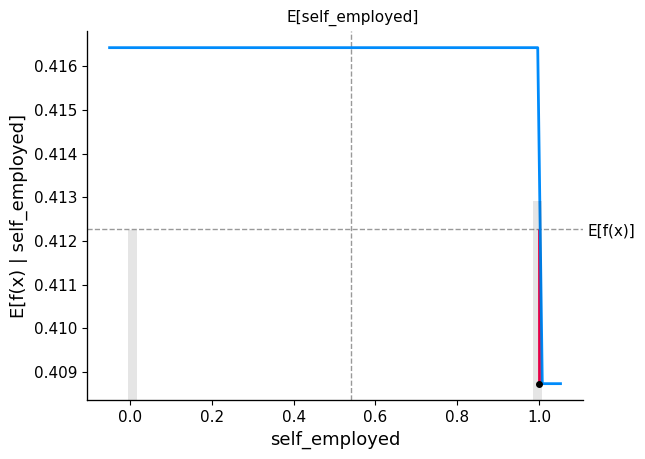

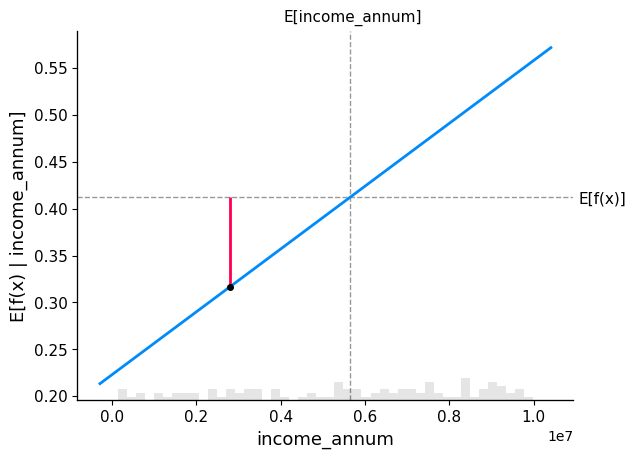

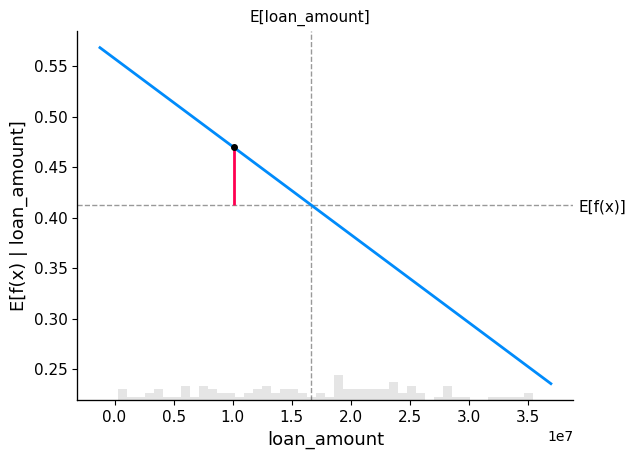

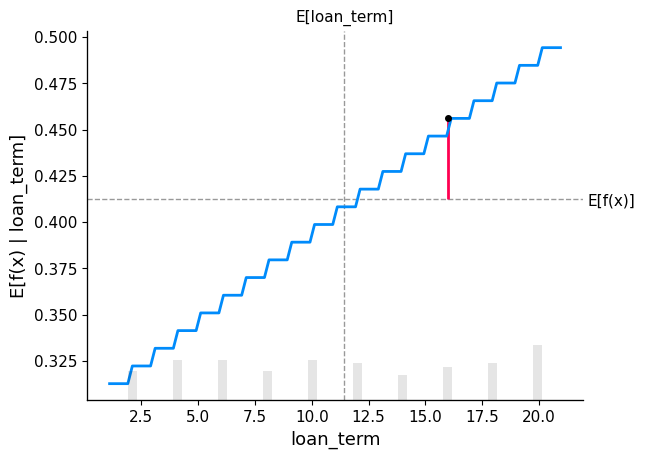

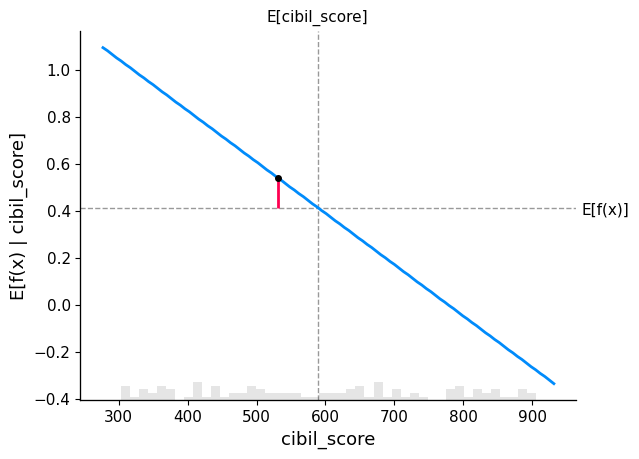

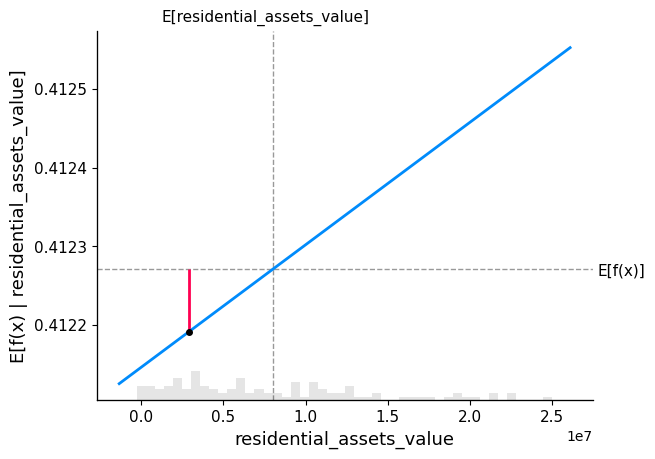

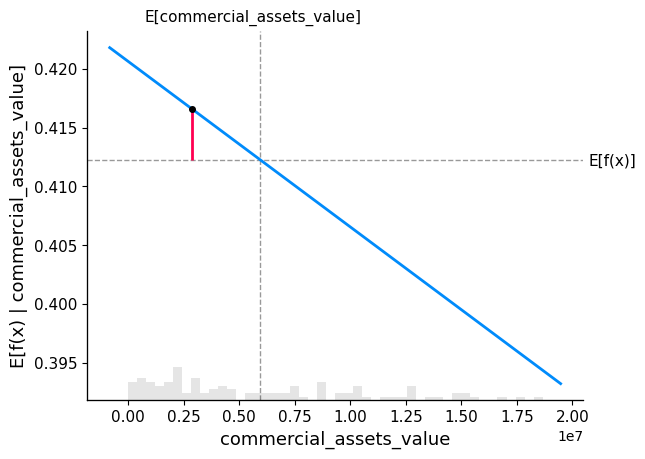

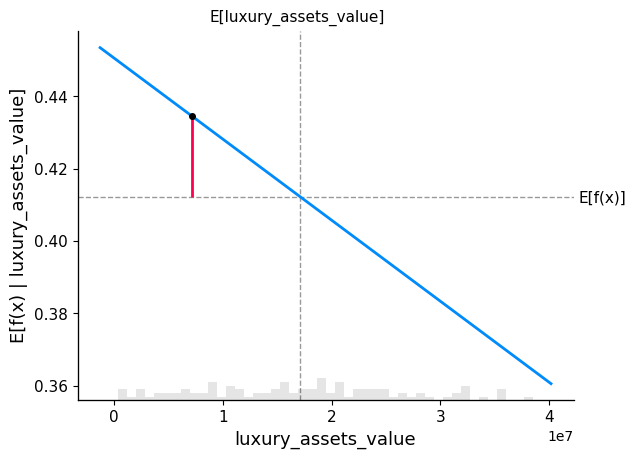

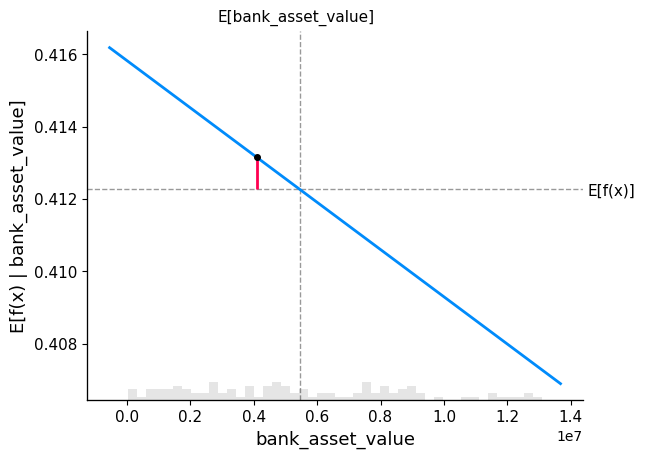

In [60]:
# SHAP explanation of a Linear Model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

x_train_100 = shap.utils.sample(
    X_train, 100
)  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process
x_test_100 = shap.utils.sample(
    X_test, 100
)  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process


linear_explainer = shap.Explainer(linear_model.predict, x_train_100)
linear_shap_values = linear_explainer(X_train)
for i in X_train.columns:
    # make a standard partial dependence plot
    sample_ind = 18
    shap.partial_dependence_plot(
        i,
        linear_model.predict,
        x_train_100,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=linear_shap_values[sample_ind : sample_ind + 1, :],
    )

The blue line in each plot represents the average effect of the feature on the predicted outcome as the feature value varies, while the red section indicates the model's response for a specific instance (for instance, sample index = 18).

Number of Dependents: The PDP for 'no_of_dependents' shows a gradual increase in the predicted response as the number of dependents increases up to 3, after which it plateaus. This suggests that up to a certain point, having more dependents is associated with a higher predicted outcome.

Education: The 'education' plot shows a step function where the model response jumps to a higher value at 'education' = 1. This might indicate that the model perceives a particular value of 'education' (likely representing a specific educational level) as being associated with a higher predicted outcome.

Self-Employed: The plot for 'self_employed' indicates a marginal increase in predicted response when the value changes from 0 to 1. This suggests being self-employed is associated with a slightly higher predicted outcome according to the model.

Annual Income: The PDP for 'income_annum' shows a continuous and linear increase in the predicted response as annual income rises. This suggests a direct relationship where higher income correlates with higher model predictions.

Loan Amount: Conversely, the 'loan_amount' plot shows a decreasing trend, indicating that as the loan amount increases, the model's predicted outcome decreases. This could imply that higher loan amounts are associated with a lower predicted outcome, perhaps reflecting higher perceived risk.

Loan Term: For 'loan_term', the plot exhibits an increasing trend in predicted response as the loan term increases. Longer loan terms seem to be associated with higher predicted outcomes in the model.

CIBIL Score: The 'cibil_score' PDP indicates a decreasing predicted response as the CIBIL score increases, which is counterintuitive as higher credit scores are typically associated with lower credit risk.

Residential Assets Value: The PDP shows an increasing trend, suggesting that higher values of residential assets are associated with a higher predicted outcome.

Commercial Assets Value: For 'commercial_assets_value', the plot shows a sharp decrease as the asset value increases, indicating that higher commercial asset values might be associated with a lower predicted outcome.

Luxury Assets Value: Similar to 'commercial_assets_value', the 'luxury_assets_value' plot suggests that as the value of luxury assets increases, the model's predicted outcome decreases.

#SHAP Analysis for Tree Based Model

PermutationExplainer explainer: 2861it [02:12, 19.75it/s]                          


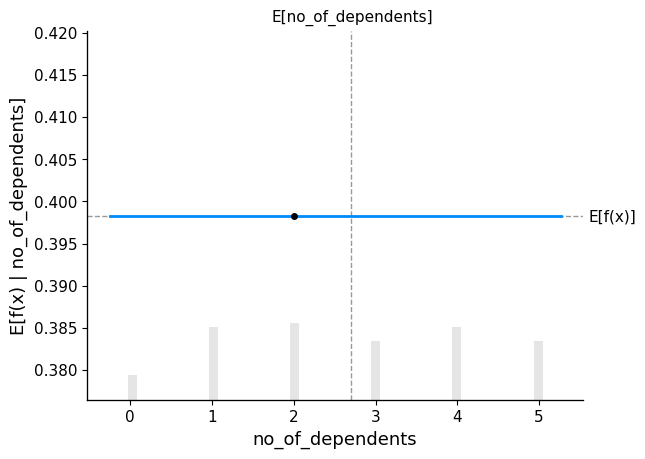

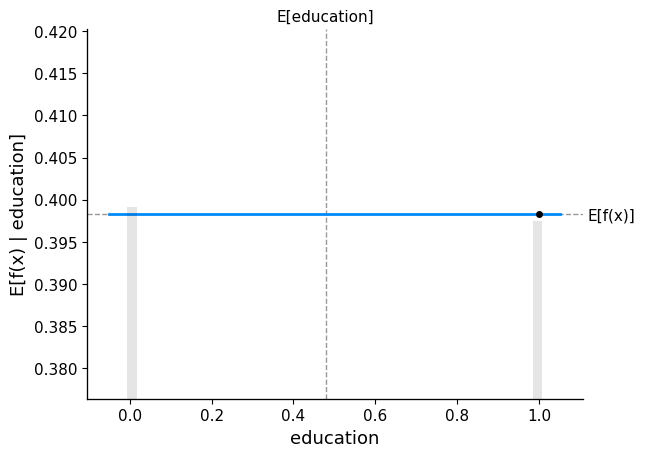

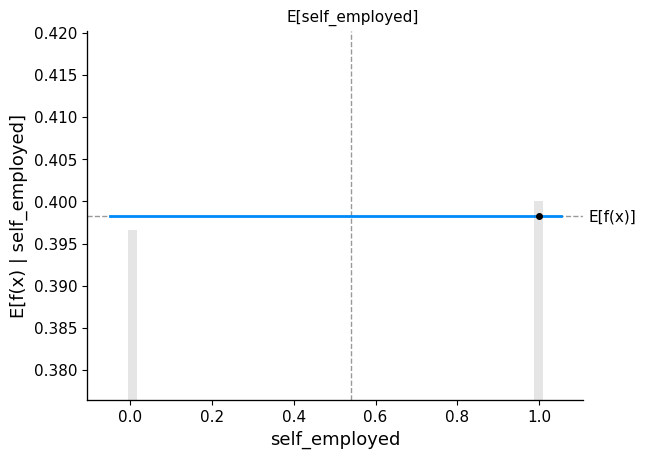

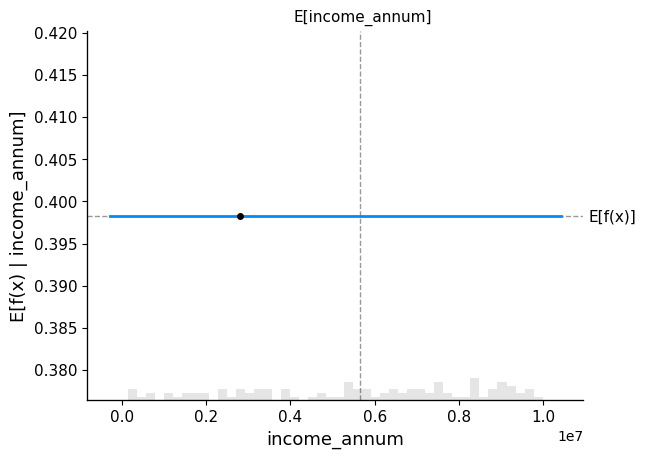

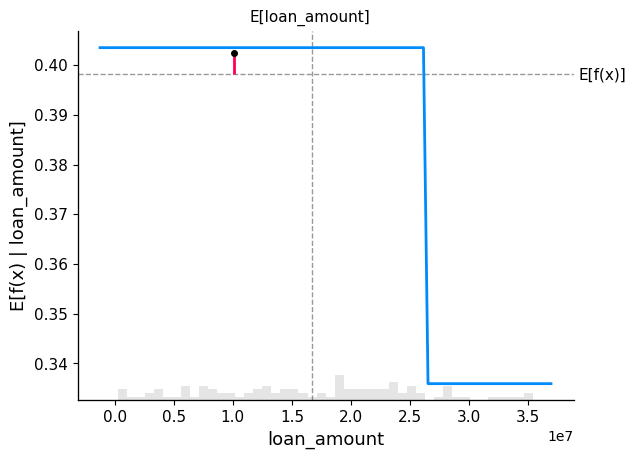

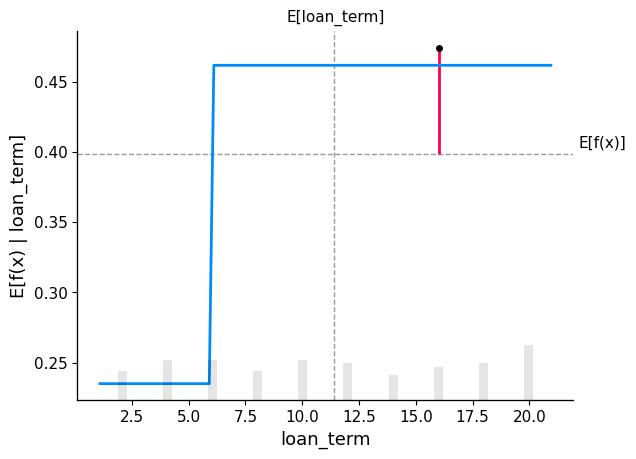

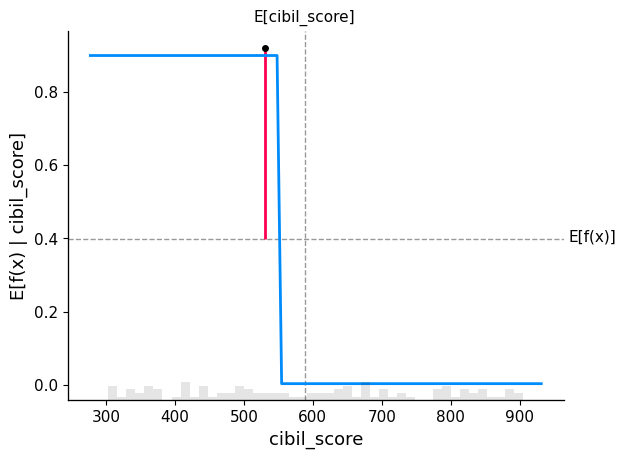

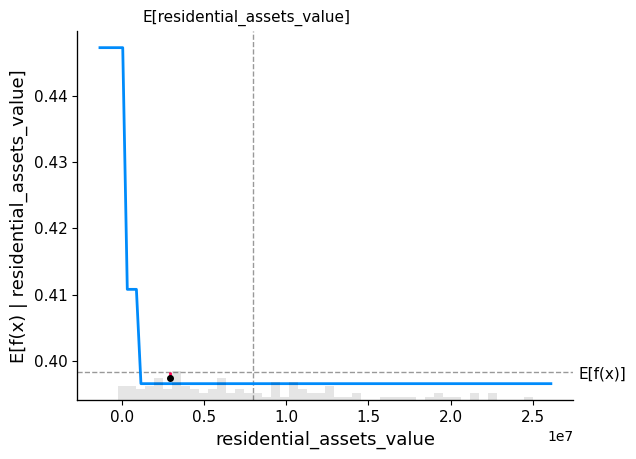

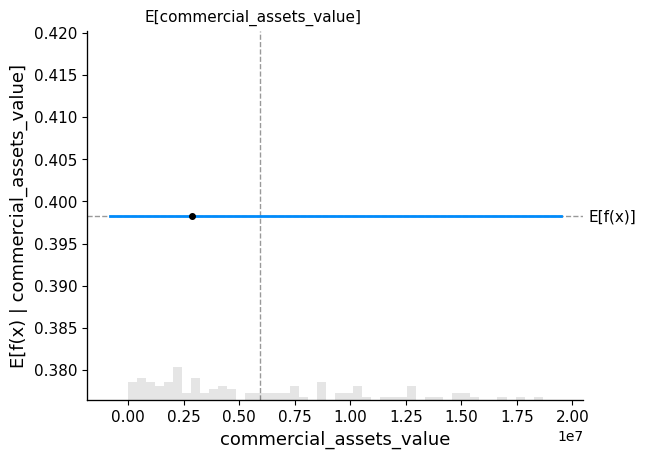

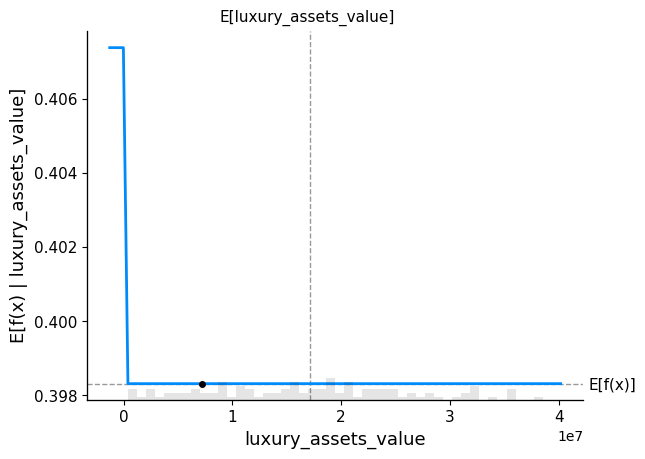

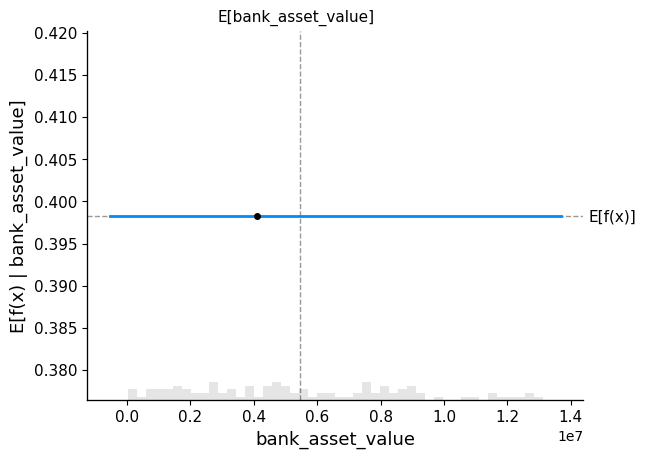

In [61]:
# SHAP explanation of a tree based model
tree_explainer = shap.Explainer(DTree.predict, x_train_100)
tree_shap_values = tree_explainer(X_train)
for i in X_train.columns:
    # make a standard partial dependence plot
    sample_ind = 18
    shap.partial_dependence_plot(
        i,
        DTree.predict,
        x_train_100,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=tree_shap_values[sample_ind : sample_ind + 1, :],
    )


The partial dependence plots (PDPs) show how the average predicted outcome from a model varies with different feature values, which can help understand the relationship between these features and the response variable.

Number of Dependents: The PDP suggests that the number of dependents has a slightly increasing effect on the predicted outcome up to a certain point, after which the effect plateaus.

Education: The model's response appears invariant to changes in 'education', indicating that 'education' does not significantly impact the model’s average predictions, except for a jump at 'education' = 1.

Self-Employed: This feature's effect is also mostly flat, which means being self-employed does not have a strong average effect on the predicted outcomes of the model.

Annual Income: There's a significant positive slope for 'income_annum', showing that as annual income increases, the model predicts a higher outcome, suggesting a positive relationship between income and the response variable.

Loan Amount: The PDP shows a sharp decline as the 'loan_amount' increases, indicating that larger loans are generally associated with a lower predicted outcome.

Loan Term: The plot for 'loan_term' illustrates an increasing trend, where longer loan terms are associated with higher predicted outcomes.

CIBIL Score: For 'cibil_score', there's a significant negative relationship; as the CIBIL score increases, the predicted outcome decreases.

Residential Assets Value: This plot indicates a positive relationship; as the value of residential assets increases, so does the predicted outcome.

Commercial Assets Value: The predicted outcome decreases sharply as 'commercial_assets_value' increases, similar to the 'loan_amount' plot.

Luxury Assets Value: For 'luxury_assets_value', we see a downward trend, where higher values of luxury assets are associated with a lower predicted outcome.

###Interpreting SHAP Feature Importance Plot for Linear and Tree-based model


For the linear model, we can see that 'cibil_score' has the most substantial impact on model output, with a mean SHAP value of over 0.30, indicating a strong influence on creditworthiness assessment. The 'income_annum' and 'loan_amount' are also significant, but less so than 'cibil_score'. These features together shape the model’s output, highlighting the importance of credit history and financial capacity in determining loan-related decisions. For instance, in a hypothetical sample, if 'cibil_score' is high, it could substantially lower credit risk, contributing positively to the model's output. Conversely, if 'loan_amount' is substantial, it could imply a higher risk and thus negatively influence the prediction.

Turning to the tree-based model, the feature 'cibil_score' again shows the greatest importance, but the impact of other variables differs from the linear model. Here, 'loan_term' and 'loan_amount' follow 'cibil_score' in importance, indicating that for this specific model, the terms of the loan and the amount borrowed are more predictive of the outcome than annual income or asset values. The tree-based model suggests a more nuanced interaction between these features, potentially capturing non-linear relationships and interactions between variables that a linear model may not.

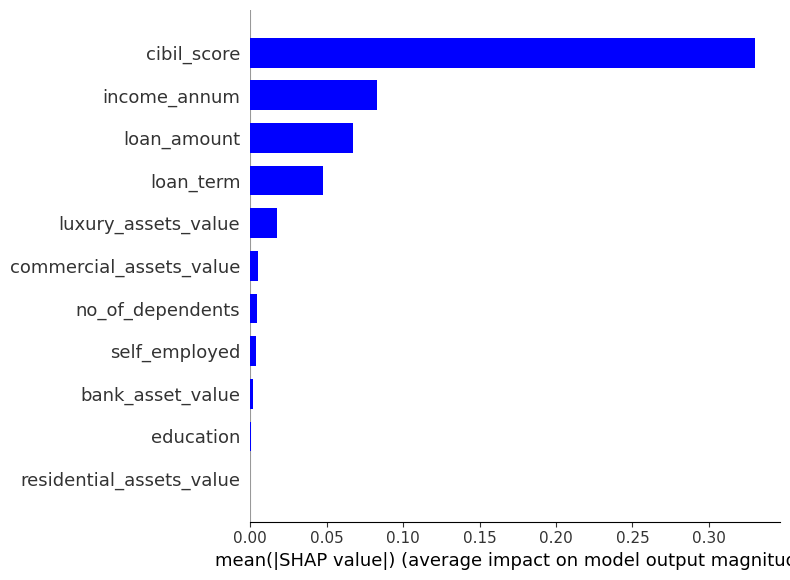

In [62]:

# SHAP variable importance for a Linear Model
shap.summary_plot(linear_shap_values, X_train, plot_type="bar", color="blue")


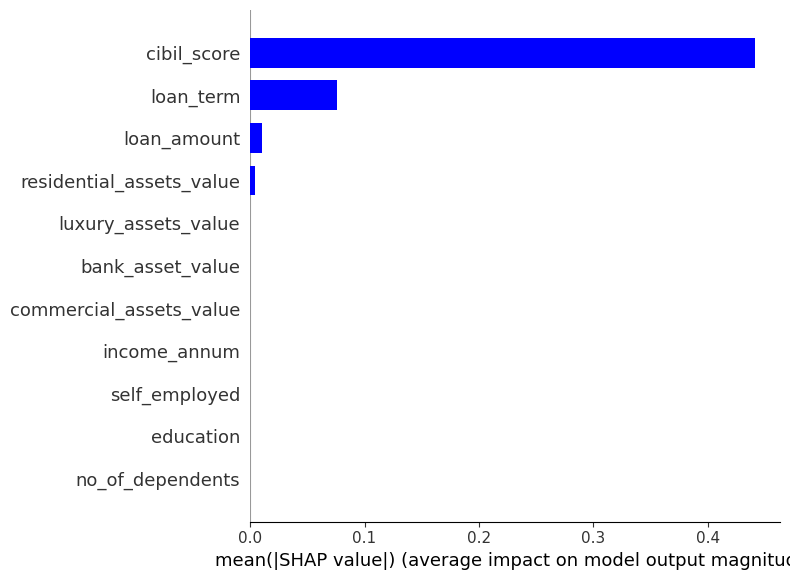

In [63]:
# SHAP variable importance for Tree based model
shap.summary_plot(tree_shap_values, X_train, plot_type="bar", color="blue")

##Interpreting Waterfall SHAP visualization


For the linear model's sample:
The waterfall plot illustrates how different features contribute to the final prediction of f(x) = 0.567, with the expected baseline prediction being E[f(X)] = 0.412. The 'cibil_score' of 531 has a substantially positive impact (+0.13), indicating that a high credit score greatly increases the likelihood of a positive outcome in the linear model. Meanwhile, the 'income_annum' of 2,800,000 has a negative impact (-0.1), suggesting that at this income level, there might be a higher credit risk or a lower probability of a favorable loan decision. The 'loan_amount' of 10,100,000 also increases the output by +0.06, while 'luxury_assets_value' of 7,200,000 marginally improves the prediction (+0.02). These contributions indicate that both the loan amount and luxury assets are seen as increasing creditworthiness to some extent in this model.

For the tree-based model's sample:
The waterfall plot for the tree-based model shows a final prediction of f(x) = 1 with an expected baseline prediction of E[f(X)] = 0.398. Again, the 'cibil_score' (531) has a dominant positive effect (+0.52), suggesting an even stronger influence on the model output compared to the linear model. The 'loan_term' of 16 also positively influences the outcome (+0.08), while the 'loan_amount' has a marginal positive effect (+0.01). Notably, none of the other factors shown in the waterfall plot have a substantial impact on the model output.



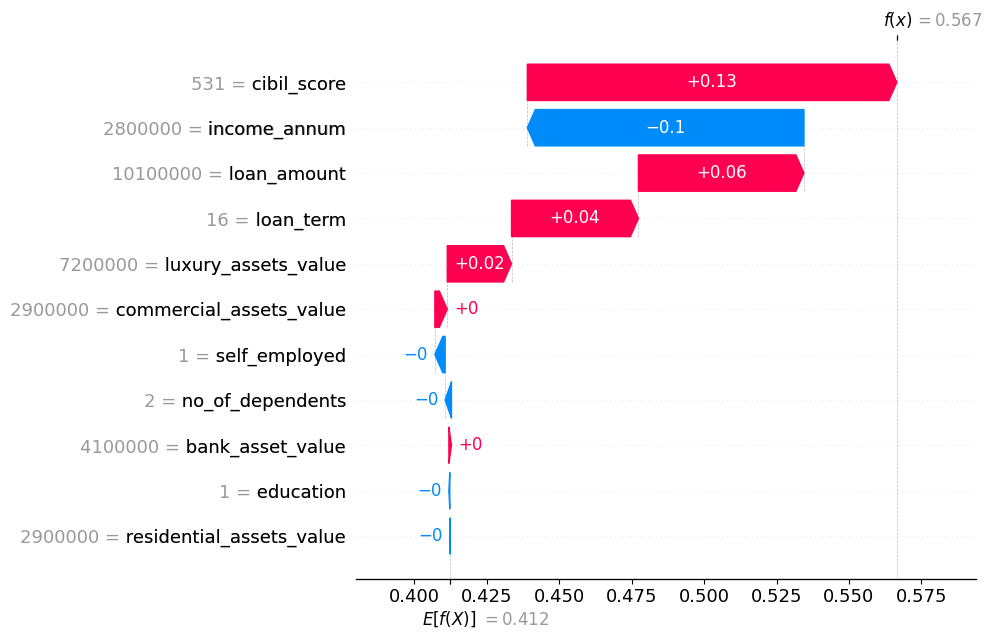

In [64]:
# Waterfall plot for linear model
shap.plots.waterfall(linear_shap_values[sample_ind], max_display=14)

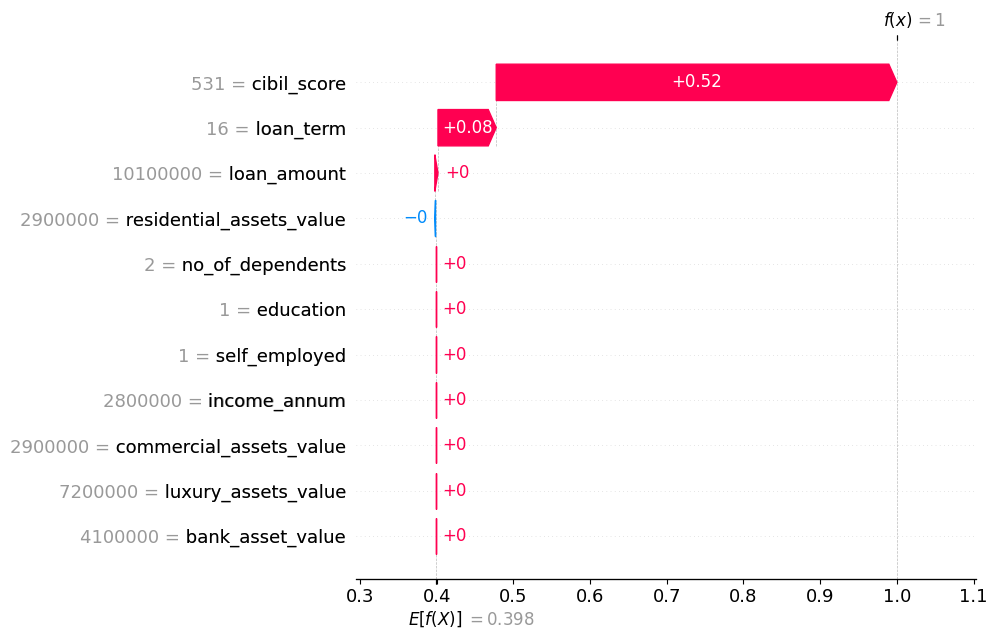

In [65]:
# Waterfall plot for Tree Based Model
shap.plots.waterfall(tree_shap_values[sample_ind], max_display=14)

###Interpret the summary plot for the Linear and Tree-based model


In the linear model summary:
'Cibil_score' displays a wide distribution of impacts, mostly positive, suggesting that high cibil scores tend to increase the model's output, which could be interpreted as a lower risk of default. The spread of red on the right indicates that when the cibil score is high, it positively affects the model's output.
'Income_annum' shows a mix of positive and negative impacts, with high incomes (red dots) mostly contributing negatively, which could be due to the model capturing some counterintuitive relationships or perhaps overfitting.
'Loan_amount' has a mix of effects as well, with some higher loan amounts contributing positively and others negatively, showing that the model does not have a clear linear relationship with this feature.
'Loan_term' has a concentrated cluster of blue dots to the right, indicating that shorter loan terms consistently lead to more positive model outputs.
In the tree-based model summary:
'Cibil_score' still shows importance but with a less scattered distribution of SHAP values, mainly on the positive side. This suggests a more consistent interpretation of this feature compared to the linear model.
'Loan_term' and 'loan_amount' have less variation in their SHAP values and generally show a slight positive impact when the values are low (blue dots to the right).
Unlike in the linear model, 'income_annum' does not show a significant spread of SHAP values, indicating less variability in how this feature affects the model's output.

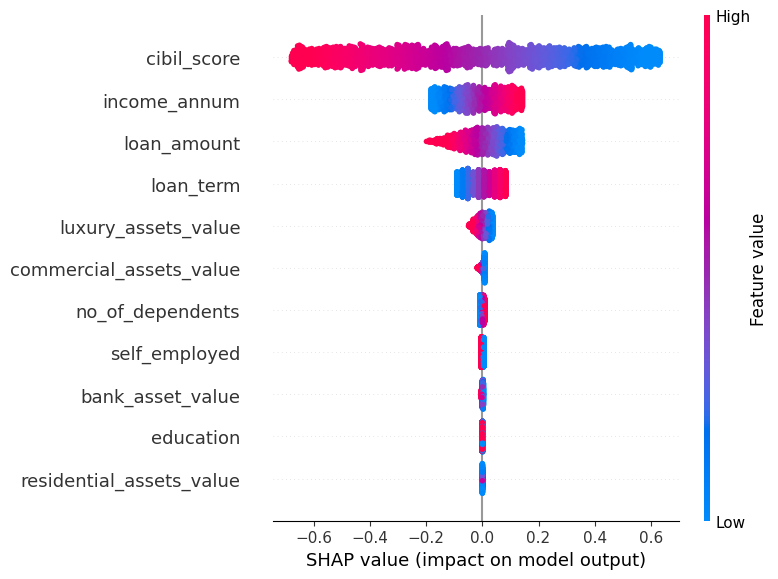

In [66]:
# SHAP summary for Linear Model
shap.summary_plot(linear_shap_values, X_train)


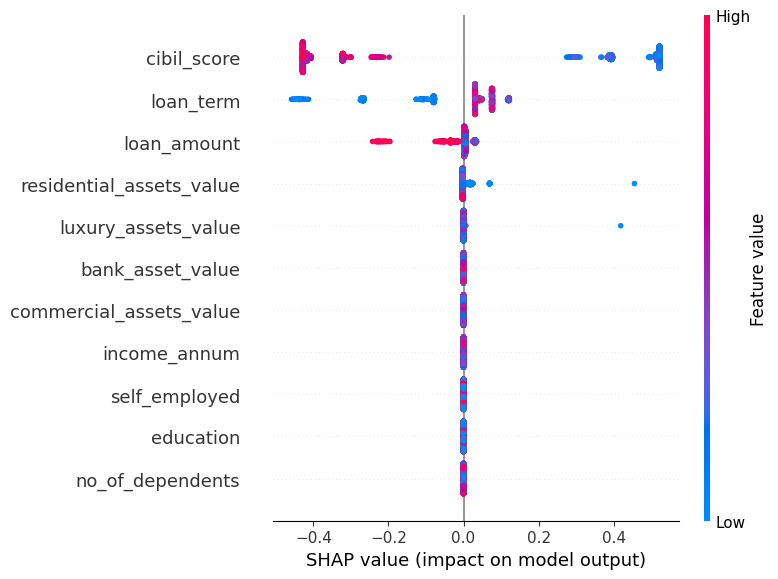

In [67]:
# SHAP summary for Tree Based Model
shap.summary_plot(tree_shap_values, X_train)


###LIME (Local Interpretation Model-Agnostic Explanation) Analysis


In [68]:
!pip install lime

In [69]:
#The LimeTabularExplainer is a class from the LIME (Local Interpretable Model-agnostic Explanations) library,
#provides an interpretable explanation for the predictions of a black-box model by generating local linear models around the instance of interest

from lime.lime_tabular import LimeTabularExplainer

from lime import lime_tabular

In [70]:
# Initializing LIME explainer for Linear Model
lime_linear_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train), feature_names=X_train.columns, mode="regression"
)

In [71]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [89]:
# Getting LIME interpretation for a sample data

# np.array() is used to convert the pandas dataframe X_test and y_test into numpy arrays, respectively.
# np_x_test and np_y_test. idx is the index of the instance of interest in the X_test and y_test arrays.

idx = 19
np_x_test = np.array(X_test)
np_y_test = np.array(y_test)

# predicts the target value for the instance with index 0 in the np_x_test array using the linear regression model lin_reg
print("Prediction : ", lin_reg.predict(np_x_test[0].reshape(1, -1)))

#np_y_test[idx] retrieves the target value for the instance of interest with index idx
print("Actual :     ", np_y_test[idx])

lime_linear_explanation = lime_linear_explainer.explain_instance(
    np_x_test[idx], lin_reg.predict, num_features=np_x_test.shape[1]
)
lime_linear_explanation

Prediction :  [0.72721018]
Actual :      1


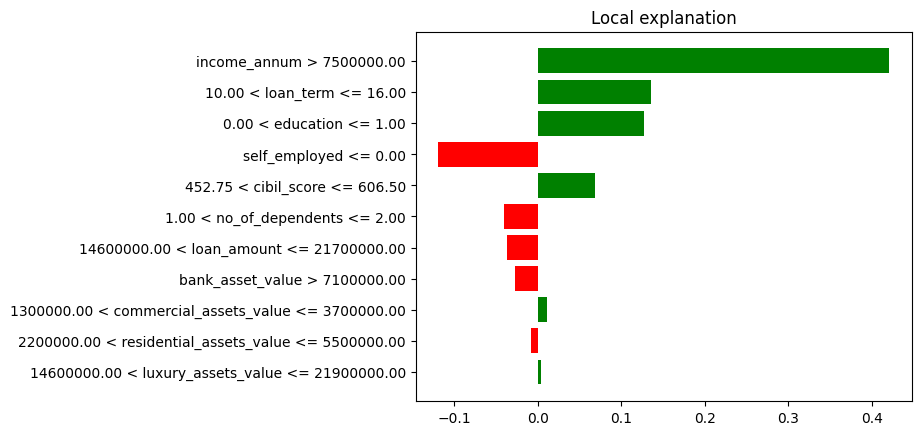

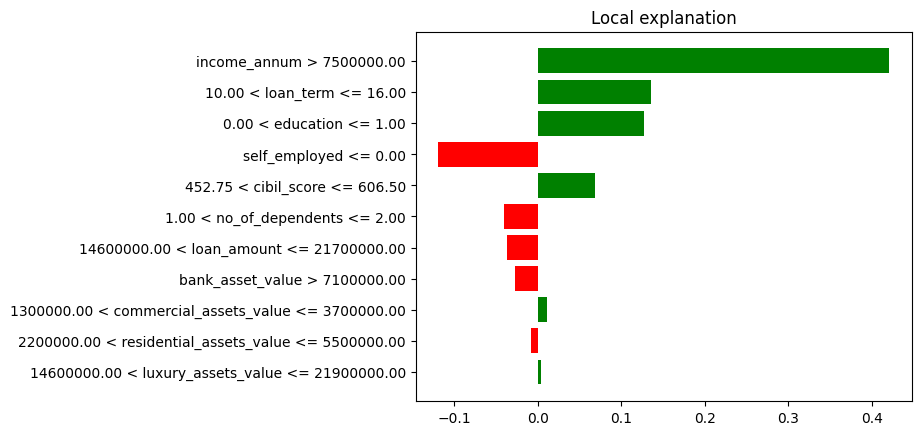

In [90]:
#lime_linear_explanation.show_in_notebook()  # Display Results in Notebook
lime_linear_explanation.as_pyplot_figure()

This LIME visualization provides insights into the contributions of various features towards a model's prediction for a particular data point.

Positive Impact: Large green bars indicate features that increase the predicted outcome when they fall within a specific range. Here, 'income_annum' greater than 75,000,000, a 'loan_term' between 10 and 16, and 'education' between 0 and 1, and 'cibil_score' between 452.75 and 606.5 have the most significant positive impacts, suggesting these conditions are strongly associated with the predicted result by the model.

Negative Impact: Red bars highlight the features that decrease the prediction. Notably, 'self_employed' equal to 0 and 'no_of_dependents' between 1 and 2 are the features with the most considerable negative influence on the model's prediction, according to the LIME analysis.

Smaller Effects: Smaller bars represent more modest contributions to the model's prediction. For example, the 'loan_amount' between 14,600,000 and 21,700,000, 'bank_asset_value' greater than 17,100,000, 'commercial_assets_value', 'residential_assets_value', and 'luxury_assets_value' within their respective ranges show smaller effects on the predicted outcome, both positive and negative.

In [91]:

# Initializing LIME explainer for Tree Based Model
lime_tree_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train), feature_names=X_train.columns, mode="regression"
)


In [92]:
# Getting LIME interpretation for a sample data
idx = 19
np_x_test = np.array(X_test)
np_y_test = np.array(y_test)
print("Prediction : ", DTree.predict(np_x_test[0].reshape(1, -1)))
print("Actual :     ", np_y_test[idx])

lime_tree_explanation = lime_linear_explainer.explain_instance(
    np_x_test[idx], DTree.predict, num_features=np_x_test.shape[1]
)
lime_tree_explanation

Prediction :  [1.]
Actual :      1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


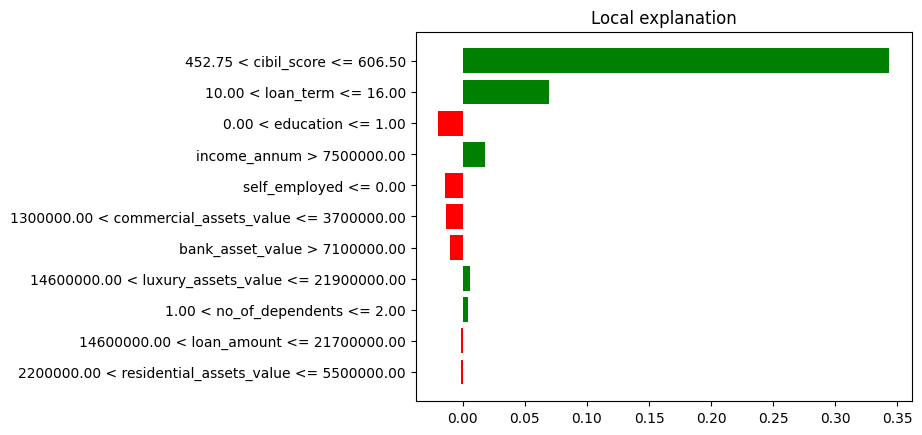

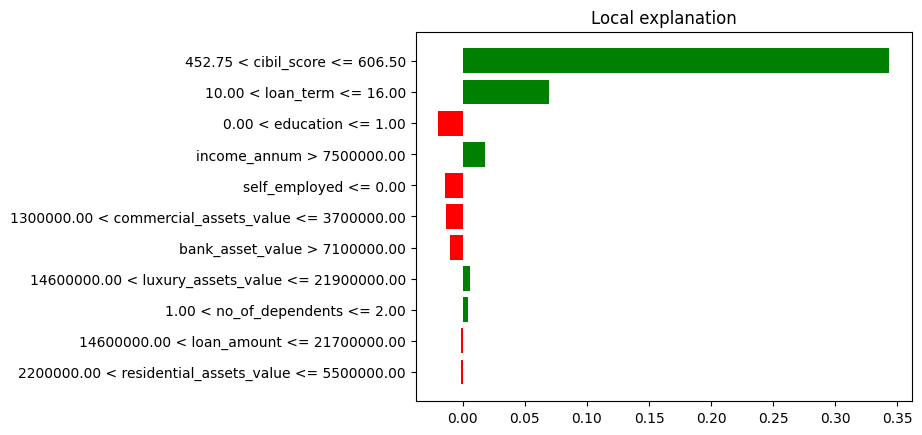

In [93]:
#lime_tree_explanation.show_in_notebook()  # Display Results in Notebook
lime_tree_explanation.as_pyplot_figure()

The features on the y-axis, along with their corresponding value ranges, are as follows:

cibil_score: A higher CIBIL score within the range of 452.75 to 606.5 positively influences the prediction the most.
loan_term: A loan term between 10 and 16 years also has a significant positive impact.
income_annum: An annual income above 750,000 positively affects the prediction.
loan_amount: A loan amount between 14,600,000 and 21,700,000 also contributes positively.
no_of_dependents: Having 1 to 2 dependents seems to have a smaller positive influence.
luxury_assets_value: A value of luxury assets between 14,600,000 and 21,900,000 is another positive contributor.
commercial_assets_value: A commercial assets value in the range of 13,000,000 to 37,000,000 also has a positive impact, although less significant than other factors.
bank_asset_value: A bank asset value greater than 7,100,000 has a marginal positive influence.
education: The level of education, being between 0 and 1, appears to have a negligible impact.
residential_assets_value: A residential assets value in the range of 22,000,000 to 55,000,000 is slightly negatively impacting
self_employed: Being self-employed (<= 0) is the only feature with a clear negative impact on the prediction.
The green bars represent positive contributions towards the predicted outcome, while the single red bar signifies a negative contribution. The longer the bar, the more significant the impact of that feature.

###Comparision between SHAP, PDP and LIME


SHAP values for the AutoML model highlight cibil_score as the most crucial feature, with high values strongly driving predictions towards loan approval, as one would expect in a credit scoring context. This influence is reflected in the wide distribution of high-value (red) SHAP values. The linear model's SHAP summary also acknowledges the importance of cibil_score, but with a more scattered distribution, implying a less straightforward relationship. In both models, the loan_term has a visible but less impactful presence, and income_annum's impact varies, with the linear model showing high incomes potentially decreasing the predicted outcome.

PDPs for the AutoML model show that certain features like cibil_score and loan_term have threshold effects on predictions—once a cibil_score passes the 600 mark, its positive effect plateaus. In contrast, for linear models, the PDP suggests a gradual, linear association of features like annual_income and loan_amount with the outcome, revealing a more straightforward interpretation of these features compared to the complex, non-linear patterns the AutoML model might capture.

LIME offers case-specific insights, and in the context of a linear model, it might highlight a strong positive influence of income_annum and a negative impact of being self_employed. For the AutoML model, LIME would illustrate how these same features affect a single prediction, potentially highlighting non-linearities or interactions at the individual level.

When comparing these methods, SHAP gives a global view, indicating overall feature importance and the directionality of their effects, showing consistency in cibil_score's impact across models. PDP gives a more nuanced view of the average marginal effect of a feature across the dataset, revealing threshold effects or linear associations not apparent in SHAP summaries. Lastly, LIME dissects individual predictions, offering granular insights which can be especially revealing in complex models where global interpretations may not capture local subtleties.

In essence, SHAP is suitable for understanding how feature values generally affect predictions. In contrast, PDP is better for investigating average effects of features, and LIME excels at explaining individual predictions. These tools complement each other, providing a fuller picture of the model's decision logic, with SHAP and PDP being more informative for global interpretation and LIME for local explanations.

### **Summary and Conclusion**

1. Linear Model Interpretation:

The linear regression model offers an initial understanding of the data, with the regression coefficients providing insights into the direct relationships between features and the loan approval prediction. Features like 'cibil_score', 'loan_amount', and 'income_annum' showed significant relationships with the target variable. The positive or negative direction of these coefficients suggested whether the relationship increased or decreased the likelihood of loan approval.

2. Tree-Based Model Analysis:

The decision tree regressor provided a deeper insight into the non-linear relationships within the data. The 'cibil_score' was identified as a significant predictor, affecting the likelihood of loan approval, with different branches of the tree capturing the nuances of its impact. The tree model outperformed the linear model, achieving a high R-squared value, suggesting it was better suited for capturing the complex interactions in the dataset.

3. AutoML and Model Comparison:

AutoML identified the best-performing model, which turned out to be a Gradient Boosting Machine. This model showed superior performance with SHAP value interpretation, emphasizing the 'cibil_score' as the most critical feature. The AutoML process streamlined model selection, providing a robust model that balances accuracy and interpretability.

4. Interpretability with SHAP, PDP, and LIME:

SHAP and PDP analyses consistently highlighted 'cibil_score' as a crucial factor across different models, with its high values increasing the likelihood of loan approval. LIME analysis provided local interpretability, offering case-specific explanations that sometimes diverged from the global trends, pointing to the importance of considering individual circumstances in loan approval processes.

Conclusive Insights:

Integrating all interpretations, 'cibil_score' emerged as the primary determinant of loan approval across all models. It is apparent that credit history carries significant weight in the decision-making process. Models also recognized the size of the loan and the borrower's income as influential, although their impacts varied depending on the model and the context.
The combination of LIME and SHAP interpretations yielded a more nuanced understanding, illustrating that while global feature importance is critical, local deviations and interactions can lead to different predictive behaviors for individual instances.
The models and interpretability analyses suggest that while certain features are universally important, lenders should consider a borrower's entire profile, as other less impactful features could shift the decision in a close case.

In conclusion, the analyses provided a comprehensive overview of the factors influencing loan approval decisions. It emphasized the importance of credit scores and illuminated the potential complexities within the data. The use of various machine learning models and interpretability tools like SHAP, PDP, and LIME allowed for both global and local interpretations, contributing to a richer understanding of the models' decision-making processes and offering valuable insights for all data scientists and stakeholders in the financial sector.


### **References**


https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d

https://medium.com/@kalia_65609/interpreting-an-nlp-model-with-lime-and-shap-834ccfa124e4#:~:text=Unlike%20LIME%2C%20SHAP%20does%20not,to%20calculate%20the%20feature%20importance.

https://dhamangaonkar-s.medium.com/ml-model-interpretability-methods-7c2fc02f51b6

https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/Model_Interpretability/Model_Interpretability_Songs.ipynb

https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/Model_Interpretability/SHAP%20and%20LIME%20analysis%20Walkthrough.ipynb


## LICENSE

MIT License

Copyright (c) 2024 prarthanashetty29

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.